# > ###GENERAL###

In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import missingno as msno
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder
from scipy.stats import zscore
from scipy.stats import median_abs_deviation
from scipy.stats.mstats import winsorize


In [2]:
# Importamos dataset
bmw = pd.read_csv("bmw_pricing_v3.csv")

**ANÁLISIS**

ANÁLISIS GENERAL - ESTRUCTURA DE DATOS

In [3]:
# Entender el dataset
# Parece un dataset donde todos los coches son de marca bmw, coches de segundo mano (ya hay km y recorrido), y fecha de venta, coches ya vendidos
bmw.head ()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     317.0            NaN        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaN        diesel     red   
4   BMW    425   97097.0     160.0            NaN        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio fecha_venta  
0                  NaN  11300.0  2018-01-01  
1                 True  69700.0  2018-02-01  
2                False  10200.0  2018-02-01  
3                  NaN  25100.0  2018-02-01  
4                 True  33400.0  2018-04-01

In [4]:
bmw.info ()
# Tenemos booleanas, floats y objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
# Cuantos registros hay en total
bmw.size

87174

In [6]:
# Tamaño del dataset
bmw.shape

(4843, 18)

In [7]:
# Total de filas
len(bmw)

4843

ANALISIS CORRELACION INICIAL

In [8]:
# Análisis de correlación inicial, hay alguna variable correlacionada?

In [9]:
# Hacemos una correlación para detectar si hay variables que explican lo mismo (lo va a hacer solamente con numericos)
corr = bmw.corr(numeric_only=True)

In [10]:
# No se observa una correlación directa inicial entre los diferentes campos
# Hay algo de correlacion entre precio y potencia
corr.style.background_gradient(cmap="coolwarm")

ANÁLISIS DUPLICADOS

In [11]:
# Analizamos duplicados en nuestro dataset. # No hay duplicados
bmw[bmw.duplicated]

Empty DataFrame
Columns: [marca, modelo, km, potencia, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, fecha_venta]
Index: []

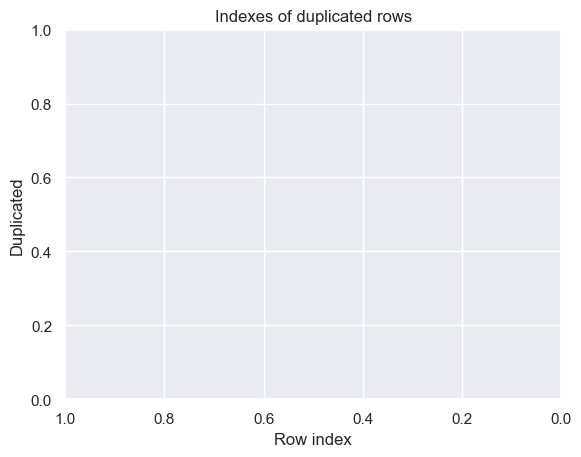

In [12]:
# Funcion para ver duplicados en el dataset. No hay duplicados
duplicated_rows = pd.DataFrame({
    'duplicated': bmw.duplicated(),
    'row': range(1, len(bmw) + 1)
})


duplicated_rows = duplicated_rows[duplicated_rows['duplicated']]

plt.figure()
plt.vlines(duplicated_rows['row'], ymin=0, ymax=1, colors='black')
plt.gca().invert_xaxis()
plt.title('Indexes of duplicated rows')
plt.xlabel('Row index')
plt.ylabel('Duplicated')
plt.show()

ANÁLISIS UNIVARIABLE - COLUMNA A COLUMNA 

In [13]:
# Saber cuantos valores tenemos de cada variable (dentro de cada columna)
for i in bmw:
  print(i, bmw[i].value_counts())

marca marca
BMW    3873
Name: count, dtype: int64
modelo modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
km km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64
potencia potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64
fecha_registro fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dty

In [14]:
# Analizar la columna marca
bmw["marca"].value_counts()

marca
BMW    3873
Name: count, dtype: int64

In [15]:
# Analizar la columna modelo
bmw["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [16]:
# Visualizar ambas columnas: marca y modelo
bmw[["marca", "modelo"]]

marca             modelo
0      NaN                118
1      BMW                 M4
2      BMW                320
3      BMW                420
4      BMW                425
...    ...                ...
4838   BMW    218 Gran Tourer
4839   BMW  218 Active Tourer
4840   BMW    218 Gran Tourer
4841   BMW  218 Active Tourer
4842   BMW                525

[4843 rows x 2 columns]

In [17]:
# Analizar la columna km
bmw["km"].value_counts()

km
123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: count, Length: 4784, dtype: int64

<Axes: >

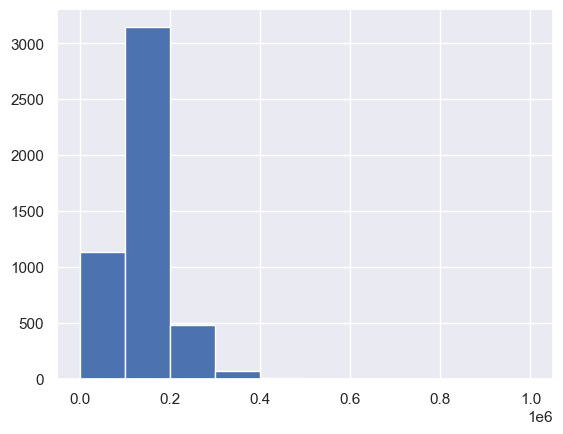

In [18]:
# Analizar el histograma de la columna km
bmw["km"].hist()

In [19]:
# Analizar la columna potencia
bmw["potencia"].value_counts()

potencia
135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64

<Axes: >

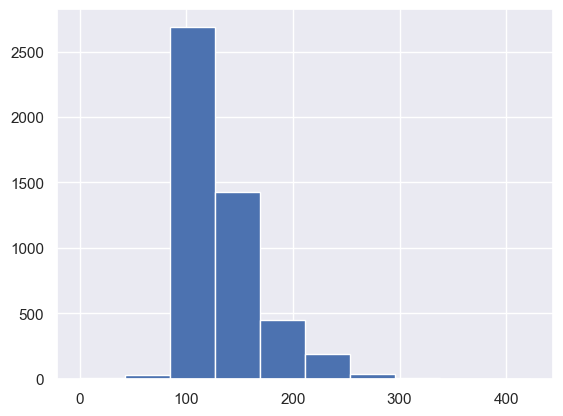

In [20]:
# Analizar el histograma de la columna potencia
bmw["potencia"].hist()

In [21]:
bmw.head(5)

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     317.0            NaN        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaN        diesel     red   
4   BMW    425   97097.0     160.0            NaN        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio fecha_venta  
0                  NaN  11300.0  2018-01-01  
1                 True  69700.0  2018-02-01  
2                False  10200.0  2018-02-01  
3                  NaN  25100.0  2018-02-01  
4                 True  33400.0  2018-04-01

In [22]:
# Analizar la columna tipo_gasolina
bmw["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

<Axes: >

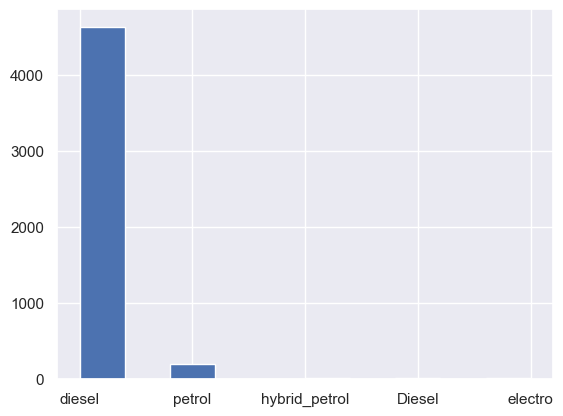

In [23]:
# Analizar el histograma de la columna tipo_gasolina
bmw["tipo_gasolina"].hist()

In [24]:
# Analizar la columna color
bmw["color"].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

<Axes: >

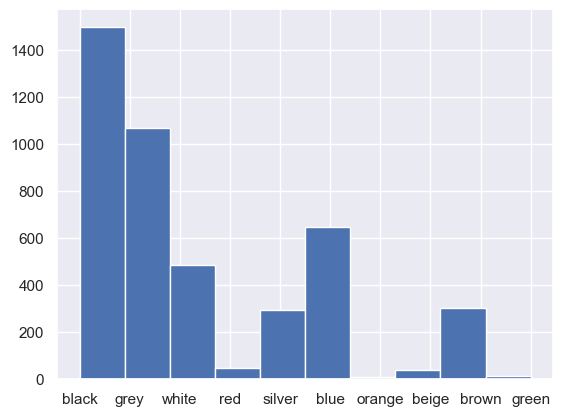

In [25]:
# Analizar el histograma de la columna color
bmw["color"].hist()

In [26]:
# Analizar la columna tipo_coche
bmw["tipo_coche"].value_counts()

tipo_coche
estate         1107
sedan           821
suv             755
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: count, dtype: int64

In [27]:
# Analizar la columna volante_regulable
bmw["volante_regulable"].value_counts()

volante_regulable
True     2662
False    2177
Name: count, dtype: int64

In [28]:
# Analizar la columna aire_acondicionado
bmw["aire_acondicionado"].value_counts()

aire_acondicionado
True     3465
False     892
Name: count, dtype: int64

In [29]:
# Analizar la columna camara_trasera
bmw["camara_trasera"].value_counts()

camara_trasera
False    3864
True      977
Name: count, dtype: int64

In [30]:
# Analizar la columna asientos_traseros_plegables
bmw["asientos_traseros_plegables"].value_counts()

asientos_traseros_plegables
False    1150
True      302
Name: count, dtype: int64

In [31]:
# Analizar la columna elevalunas_electrico
bmw["elevalunas_electrico"].value_counts()

elevalunas_electrico
False    2612
True     2229
Name: count, dtype: int64

In [32]:
# Analizar la columna bluetooth
bmw["bluetooth"].value_counts()

bluetooth
False    3119
True      996
Name: count, dtype: int64

In [33]:
# Analizar la columna gps
bmw["gps"].value_counts()

gps
True     4514
False     329
Name: count, dtype: int64

In [34]:
# Analizar la columna alerta_lim_velocidad
bmw["alerta_lim_velocidad"].value_counts()

alerta_lim_velocidad
True     2240
False    1875
Name: count, dtype: int64

In [35]:
# Analizar la columna precio
bmw["precio"].value_counts()

precio
13100.0    68
14900.0    65
11900.0    61
14300.0    60
13400.0    57
           ..
48200.0     1
41900.0     1
38800.0     1
28400.0     1
45100.0     1
Name: count, Length: 437, dtype: int64

<Axes: >

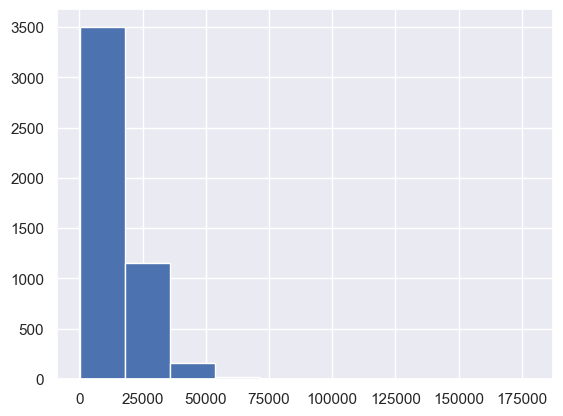

In [36]:
# Analizar el histograma de la columna precio
# No parece que hayan outliers
bmw["precio"].hist()

In [37]:
# Analizar el precio mínimo
bmw["precio"].min()

100.0

In [38]:
# Analizar el precio maximo
bmw["precio"].max()

178500.0

In [39]:
# Analizar el precio medio
bmw["precio"].mean()

15831.920611949556

In [40]:
# La media y la mediana se parecen bastante
bmw["precio"].describe()

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

In [41]:
# Comparando marca, modelo y precio
bmw[["marca", "modelo", "precio"]]

marca             modelo   precio
0      NaN                118  11300.0
1      BMW                 M4  69700.0
2      BMW                320  10200.0
3      BMW                420  25100.0
4      BMW                425  33400.0
...    ...                ...      ...
4838   BMW    218 Gran Tourer  14600.0
4839   BMW  218 Active Tourer  17500.0
4840   BMW    218 Gran Tourer  17000.0
4841   BMW  218 Active Tourer  22700.0
4842   BMW                525  15500.0

[4843 rows x 3 columns]

In [42]:
modelo_barato = bmw[bmw["precio"] == bmw["precio"].min()]["modelo"].values[0]

In [43]:
modelo_barato

'320'

In [44]:
# Un outlier, precio muy barato
bmw["precio"].min()

100.0

In [45]:
# Hay coches muy baratos, no sé si considerarlos outliers
bmw[bmw["precio"] < 500 ]

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
565    NaN    320  179358.0     120.0     2013-06-01        diesel   black   
630    BMW    318  147558.0     105.0     2014-11-01           NaN   white   
879    BMW    318  134156.0     105.0     2014-06-01        diesel    grey   
1255   BMW    320  170381.0     135.0            NaN        diesel  silver   
1513   BMW    520  358332.0     100.0            NaN        diesel    blue   
1558   BMW    520  358333.0     100.0            NaN        diesel    blue   
1832   BMW    116  174524.0      85.0     2014-07-01        diesel    blue   
2473   BMW    525  230578.0      85.0     1997-07-01        diesel     NaN   
2574   BMW    525  229880.0      85.0     1997-07-01        diesel   black   
2611   BMW    525  230264.0      85.0     1997-07-01        diesel   black   
2829   BMW    525  439060.0     105.0            NaN        diesel  silver   
3062   BMW    318   98097.0      85.0     1994-01-01        petrol    blue   
3449   BMW    316  184233.0      77.0     1999-06-01        petrol     NaN   
3575   BMW    316  359661.0      75.0            NaN        petrol    grey   
4356   BMW     X3   79685.0     190.0     2014-02-01        diesel   black   

     tipo_coche volante_regulable aire_acondicionado camara_trasera  \
565         NaN             False               True          False   
630      estate             False                NaN          False   
879      estate             False               True          False   
1255        NaN              True               True          False   
1513        NaN             False              False          False   
1558     estate             False              False          False   
1832  hatchback             False               True          False   
2473      sedan             False                NaN          False   
2574      sedan             False                NaN          False   
2611      sedan             False              False          False   
2829        NaN             False              False           True   
3062      sedan              True              False          False   
3449      sedan             False              False          False   
3575      sedan             False              False          False   
4356        suv             False              False          False   

     asientos_traseros_plegables elevalunas_electrico bluetooth    gps  \
565                          NaN                False     False   True   
630                          NaN                False     False  False   
879                          NaN                False     False  False   
1255                         NaN                False     False   True   
1513                         NaN                 True     False   True   
1558                         NaN                 True       NaN   True   
1832                         NaN                False     False   True   
2473                       False                False     False   True   
2574                       False                False       NaN   True   
2611                       False                False     False   True   
2829                         NaN                False     False   True   
3062                       False                False     False   True   
3449                       False                False     False   True   
3575                       False                False     False   True   
4356                         NaN                False     False  False   

     alerta_lim_velocidad  precio fecha_venta  
565                  True   100.0  2018-03-01  
630                  True   100.0  2018-03-01  
879                  True   100.0  2018-04-01  
1255                False   100.0  2018-05-01  
1513                False   400.0  2018-07-01  
1558                  NaN   400.0  2018-07-01  
1832                  NaN   100.0  2018-03-01  
2473                  NaN   200.0  2018-08-01  
25

In [46]:
# Analizar la columna "fecha_registro"
bmw["fecha_registro"].value_counts()


fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dtype: int64

VISUALIZACION DE DATOS

In [47]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

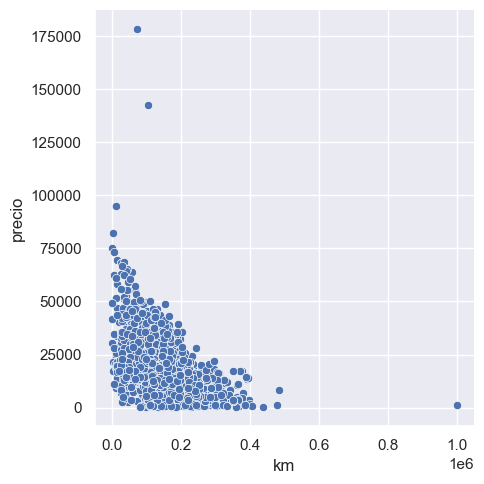

In [48]:
# Hacer un scatterplot con km y precio
sns.relplot(x="km", y="precio", data=bmw);

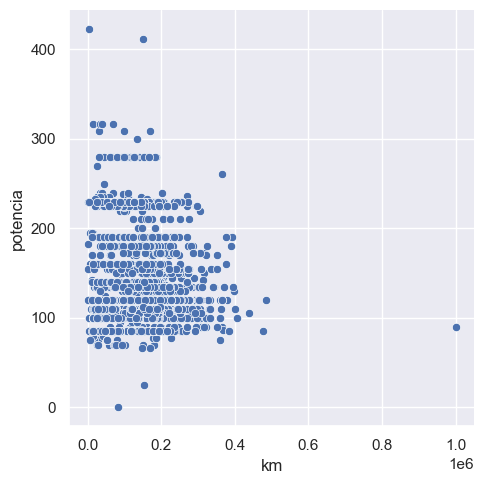

In [49]:
# Hacer un scatterplot con km y potencia
sns.relplot(x="km", y="potencia", data=bmw);

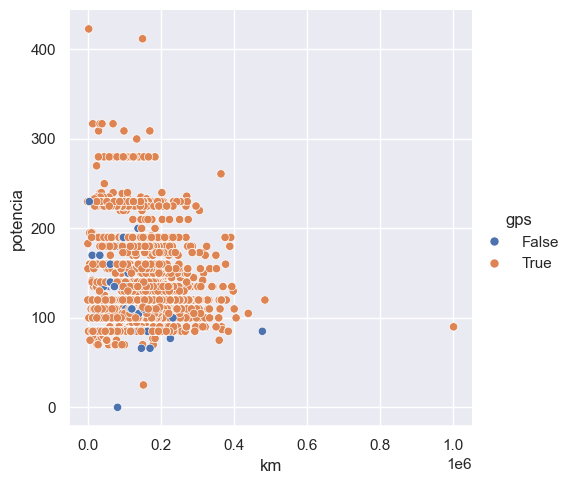

In [50]:
# Hacer un scatter plot con diferencias categoricas
sns.relplot(x="km", y="potencia", hue="gps", data=bmw);

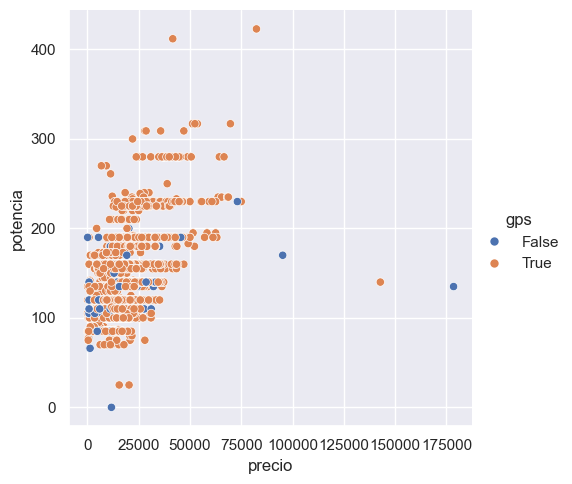

In [51]:
# Hacer un scatter plot con diferencias categoricas
sns.relplot(x="precio", y="potencia", hue="gps", data=bmw);

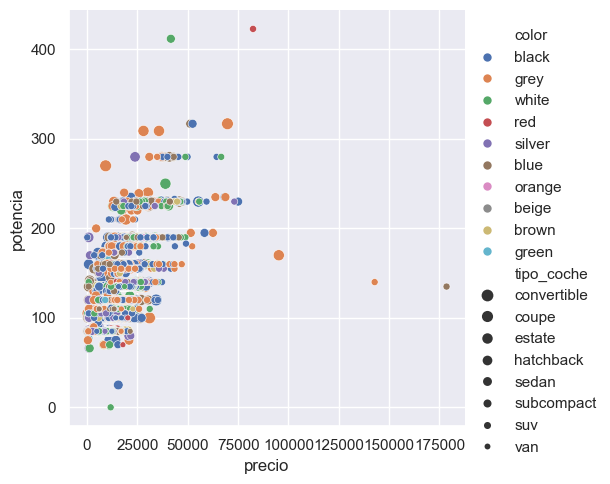

In [52]:
# Hacer un scatter plot con diferencias categoricas y tamaño
sns.relplot(x="precio", y="potencia", hue="color", size = "tipo_coche", data=bmw);

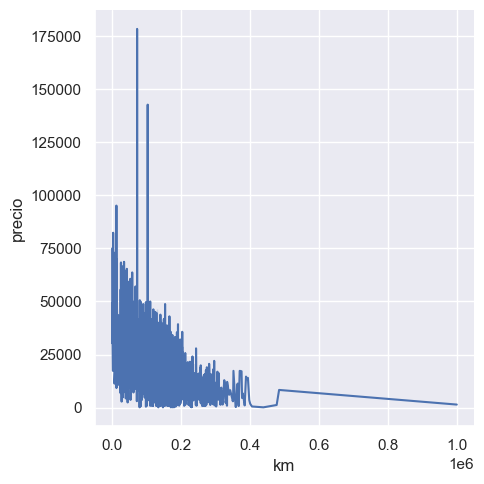

In [53]:
# Hacer un line plot con km y precio
sns.relplot(x="km", y="precio", kind="line",data=bmw);

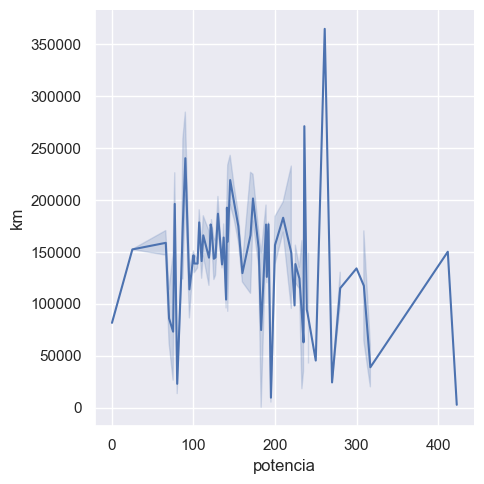

In [54]:
# Hacer un line plot con potencia y km
sns.relplot(x="potencia", y="km", kind="line",data=bmw);

**PRIMEROS CÁLCULOS - PREPROCESAMIENTO**

ANALISIS Y DECISIÓN SOBRE OUTLIERS

In [55]:
# Vamos a analizar los outliers de algunas variables. Probaremos estas 5 formas:
# 1. Histograma.
# 2. Diagrama de caja.
# 3. Z-score.
# 4. Z-score modificada.
# 5. Rango Intercuartílico (IQR).

 - km

In [56]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw["km"].describe()
# Vemos un min negativo
# ¿El máximo es muy elevado con respecto a la media?

count    4.841000e+03
mean     1.409593e+05
std      6.020853e+04
min     -6.400000e+01
25%      1.028840e+05
50%      1.410800e+05
75%      1.752170e+05
max      1.000376e+06
Name: km, dtype: float64

<Axes: >

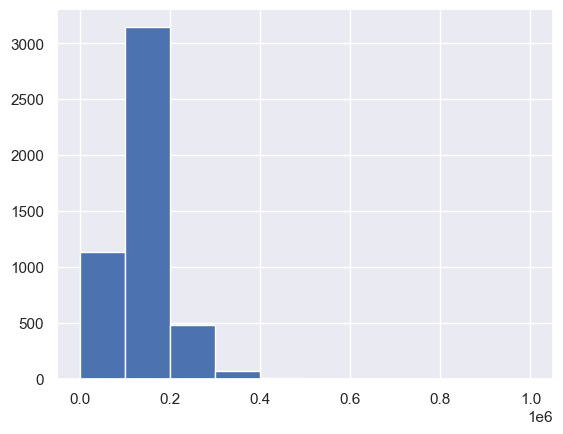

In [57]:
# 1. Histograma
bmw["km"].hist()

<Axes: xlabel='km', ylabel='Count'>

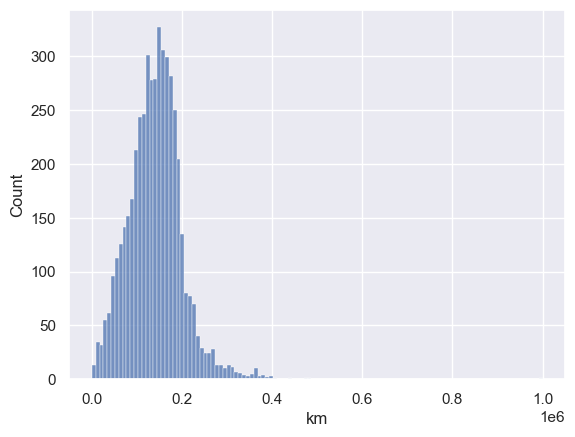

In [58]:
sns.histplot(data = bmw, x = 'km')

<Axes: xlabel='km'>

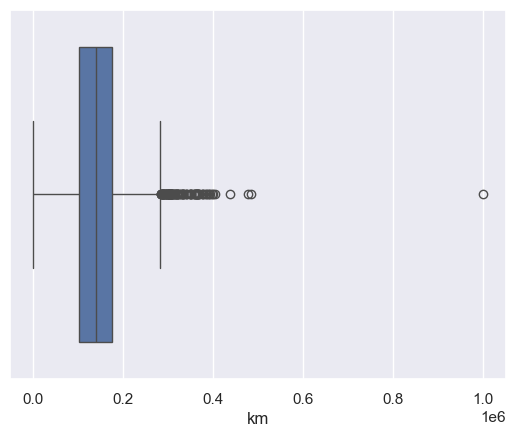

In [59]:
# 2. Diagrama de caja
# Tambien se puede poner asi: sns.boxplot(data = bmw, x = 'km')
sns.boxplot(x=bmw["km"])

In [60]:
# 3. Z-Score
z_scores_km = zscore(bmw['km'])
abs_z_scores_km = np.abs(z_scores_km)

# Select the outliers using a threshold of 3
outliers_km = bmw[abs_z_scores_km > 3]
outliers_km.head()

Empty DataFrame
Columns: [marca, modelo, km, potencia, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, fecha_venta]
Index: []

In [61]:
# 4. Z-Score modificado
mad_score_km = median_abs_deviation(bmw['km'])

In [62]:
mad_score_km

nan

In [63]:
# 5. Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth_km = bmw['km'].quantile(0.75)
twenty_fifth_km = bmw['km'].quantile(0.25)

# Obtain IQR
iqr_km = seventy_fifth_km - twenty_fifth_km

# Upper and lower thresholds
upper_km = seventy_fifth_km + (1.5 * iqr_km)
lower_km = twenty_fifth_km - (1.5 * iqr_km)

# Subset the dataset
outliers2_km = bmw[(bmw['km'] < lower_km) | (bmw['km'] > upper_km)]
outliers2_km.head()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
56    BMW    320  329173.0     110.0     2004-07-01        diesel  silver   
100   BMW    320  342768.0     135.0     2011-12-01        diesel   black   
179   BMW    320  302525.0     100.0            NaN        diesel    grey   
262   BMW    318  319724.0      90.0            NaN        diesel    grey   
450   BMW    525  316855.0     150.0     2010-12-01        diesel   black   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
56         NaN              True              False          False   
100        NaN             False               True          False   
179     estate             False                NaN          False   
262     estate              True              False          False   
450        NaN              True                NaN           True   

    asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
56                          NaN                False       NaN  True   
100                         NaN                 True     False  True   
179                         NaN                False     False  True   
262                         NaN                False     False  True   
450                       False                 True       NaN  True   

    alerta_lim_velocidad  precio fecha_venta  
56                  True  2300.0  2018-08-01  
100                  NaN  8200.0  2010-04-01  
179                False  1000.0  2018-09-01  
262                False  3000.0  2018-01-01  
450                False  9400.0  2018-04-01

In [64]:
lower_km

-5615.5

In [65]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_km)}')

Number of outliers: 97


In [66]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw2 = bmw.copy()

In [67]:
# Calculate the median
median_value_km = bmw2['km'].median()

# Impute outliers with the median
bmw2.loc[outliers2_km.index, 'km'] = median_value_km

- potencia

In [68]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw["potencia"].describe()
# ¿El máximo es muy elevado con respecto a la media?

count    4842.000000
mean      128.981826
std        38.994839
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       423.000000
Name: potencia, dtype: float64

<Axes: >

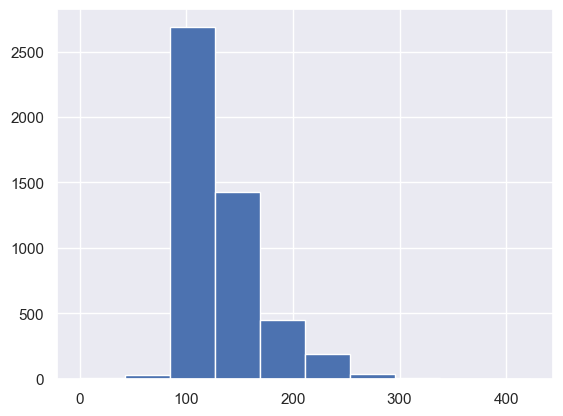

In [69]:
# 1. Histograma
bmw2["potencia"].hist()

<Axes: xlabel='potencia', ylabel='Count'>

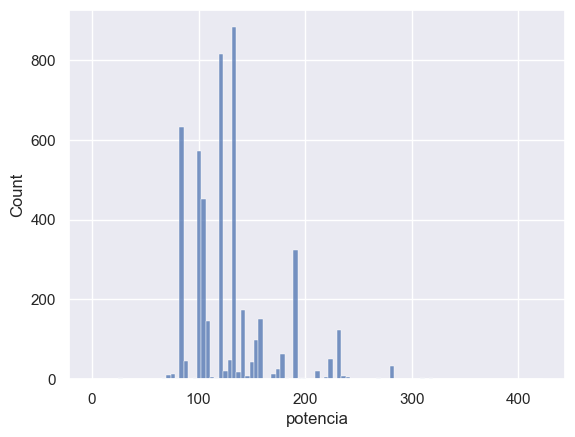

In [70]:
sns.histplot(data = bmw2, x = 'potencia')

<Axes: xlabel='potencia'>

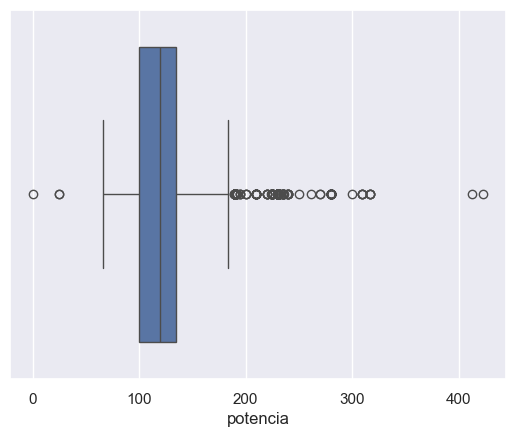

In [71]:
# 2. Diagrama de caja
sns.boxplot(x=bmw2["potencia"])

In [72]:
# 3. Z-Score
z_scores_potencia = zscore(bmw2['potencia'])
abs_z_scores_potencia = np.abs(z_scores_potencia)

# Select the outliers using a threshold of 3
outliers_potencia = bmw2[abs_z_scores_potencia > 3]
outliers_potencia.head()

Empty DataFrame
Columns: [marca, modelo, km, potencia, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, fecha_venta]
Index: []

In [73]:
# 4. Z-Score modificado
mad_score_potencia = median_abs_deviation(bmw2['potencia'])

In [74]:
mad_score_potencia

nan

In [75]:
# 5. Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth_potencia = bmw2['potencia'].quantile(0.75)
twenty_fifth_potencia = bmw2['potencia'].quantile(0.25)

# Obtain IQR
iqr_potencia = seventy_fifth_potencia - twenty_fifth_potencia

# Upper and lower thresholds
upper_potencia = seventy_fifth_potencia + (1.5 * iqr_potencia)
lower_potencia = twenty_fifth_potencia - (1.5 * iqr_potencia)

# Subset the dataset
outliers2_potencia = bmw2[(bmw2['potencia'] < lower_potencia) | (bmw2['potencia'] > upper_potencia)]
outliers2_potencia.head()

marca modelo        km  potencia fecha_registro tipo_gasolina  color  \
1    BMW     M4   13929.0     317.0            NaN        petrol   grey   
5    BMW    335  152352.0     225.0     2011-05-01        petrol  black   
17   BMW    650   24521.0     270.0            NaN        petrol   grey   
20   BMW    135  126213.0     225.0     2013-02-01        petrol  white   
26   BMW    430  113678.0     190.0            NaN        diesel  black   

     tipo_coche volante_regulable aire_acondicionado camara_trasera  \
1   convertible              True               True          False   
5           NaN              True               True          False   
17  convertible              True              False          False   
20  convertible             False              False          False   
26          NaN              True               True          False   

   asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
1                          NaN                False      True  True   
5                        False                 True      True  True   
17                       False                False     False  True   
20                         NaN                False      True  True   
26                       False                 True       NaN  True   

   alerta_lim_velocidad   precio fecha_venta  
1                  True  69700.0  2018-02-01  
5                  True  17100.0  2018-02-01  
17                False   9200.0  2018-09-01  
20                 True  16800.0  2018-05-01  
26                  NaN  30100.0  2018-05-01

In [76]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_potencia)}')

Number of outliers: 591


In [77]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw3 = bmw2.copy()

In [78]:
# Calculate the median
median_value_potencia = bmw3['potencia'].median()

# Impute outliers with the median
bmw3.loc[outliers2_potencia.index, 'potencia'] = median_value_potencia

- fecha_registro y fecha_venta (los cambio a datetime)

In [79]:
# Cambio la fecha_registro a formato datetime, y así más tarde poder restarla con fecha_venta
bmw3["fecha_registro"] = pd.to_datetime(bmw3["fecha_registro"])

In [80]:
# Cambio la fecha_venta a formato datetime

bmw3["fecha_venta"] = pd.to_datetime(bmw3["fecha_venta"])

In [81]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw3["fecha_registro"].describe()

count                             2420
mean     2012-12-06 07:35:12.396694016
min                1990-03-01 00:00:00
25%                2012-07-01 00:00:00
50%                2013-07-01 00:00:00
75%                2014-04-01 00:00:00
max                2017-11-01 00:00:00
Name: fecha_registro, dtype: object

<Axes: >

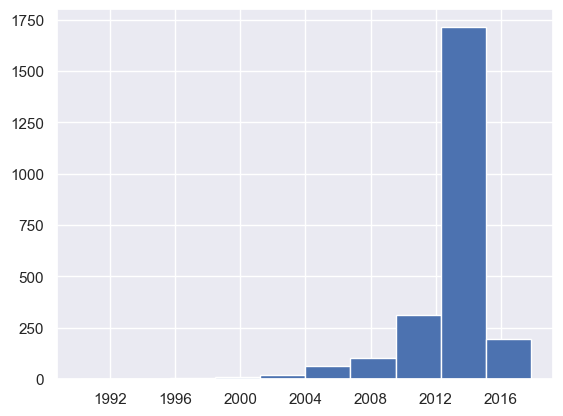

In [82]:
# 1. Histograma
bmw3["fecha_registro"].hist()

<Axes: xlabel='fecha_registro', ylabel='Count'>

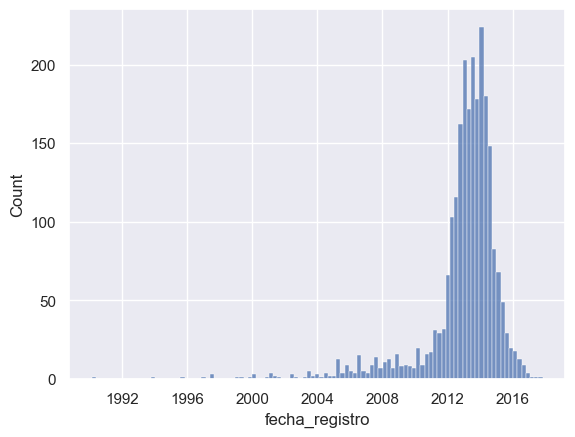

In [83]:
sns.histplot(data = bmw3, x = 'fecha_registro')

<Axes: xlabel='fecha_registro'>

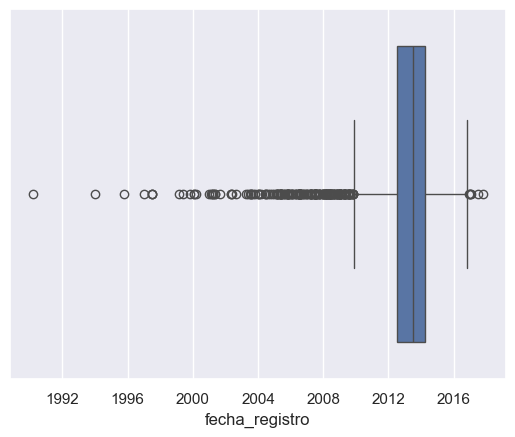

In [84]:
# 2. Diagrama de caja
sns.boxplot(x=bmw3["fecha_registro"])

In [85]:
# DECISION SOBRE OUTLIERS
# Decido mantenerlos. 

In [86]:
# Restamos ambas columnas para tener un numerico, tiempo de venta
bmw3["tiempo_venta"]=bmw3["fecha_venta"] - bmw3["fecha_registro"]

In [87]:
bmw3.head()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     120.0            NaT        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaT        diesel     red   
4   BMW    425   97097.0     160.0            NaT        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio fecha_venta tiempo_venta  
0                  NaN  11300.0  2018-01-01    2161 days  
1                 True  69700.0  2018-02-01          NaT  
2                False  10200.0  2018-02-01    2132 days  
3                  NaN  25100.0  2018-02-01          NaT  
4                 True  33400.0  2018-04-01          NaT

- precio

In [88]:
# Método ‘describe()’ para obtener una visión general rápida de la distribución y detectar la presencia de outliers en el conjunto de datos
bmw3["precio"].describe()
# ¿El máximo es muy elevado con respecto a la media?

count      4837.000000
mean      15831.920612
std        9222.630708
min         100.000000
25%       10800.000000
50%       14200.000000
75%       18600.000000
max      178500.000000
Name: precio, dtype: float64

<Axes: >

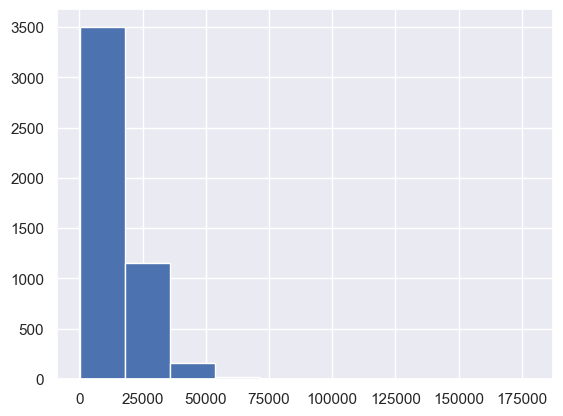

In [89]:
# 1. Histograma
bmw3["precio"].hist()

<Axes: xlabel='precio', ylabel='Count'>

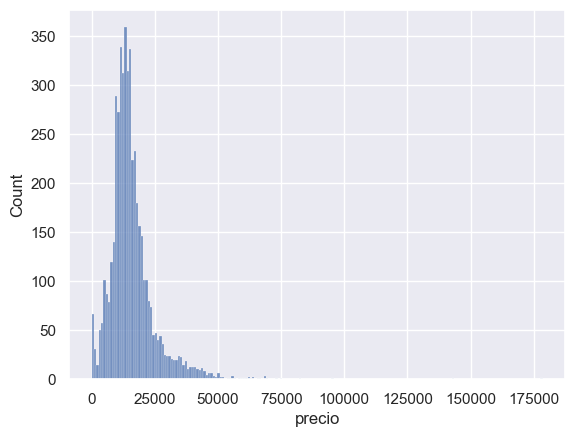

In [90]:
sns.histplot(data = bmw3, x = 'precio')

<Axes: xlabel='precio'>

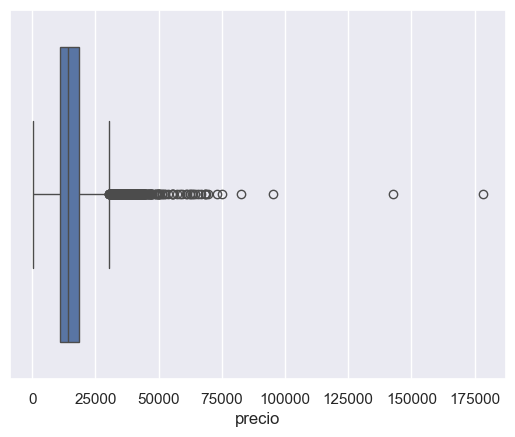

In [91]:
# 2. Diagrama de caja
sns.boxplot(x=bmw3["precio"])

In [92]:
# 3. Z-Score
z_scores_precio = zscore(bmw3['precio'])
abs_z_scores_precio = np.abs(z_scores_precio)

# Select the outliers using a threshold of 3
outliers_precio = bmw3[abs_z_scores_precio > 3]
outliers_precio.head()

Empty DataFrame
Columns: [marca, modelo, km, potencia, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, fecha_venta, tiempo_venta]
Index: []

In [93]:
# 4. Z-Score modificado
mad_score_precio = median_abs_deviation(bmw3['precio'])

In [94]:
mad_score_precio

nan

In [95]:
# 5. A partir de 75000€, decido cambiarlo por la mediana. 
# Menos de 2000€ decido cambiarlo por la mediana
outliers2_precio = bmw3[(bmw3["precio"]<= 2000) | (bmw3["precio"] > 75000)] 

In [96]:
# # Obtain number of outliers
print(f'Number of outliers: {len(outliers2_precio)}')

Number of outliers: 102


In [97]:
# DECISION SOBRE OUTLIERS
# Decido imputar, es decir, reemplazar los valores atípicos con otros valores como la mediana o la media. 
bmw4 = bmw3.copy()

In [98]:
# Calculate the median
median_value_precio = bmw4['precio'].median()

# Impute outliers with the median
bmw4.loc[outliers2_precio.index, 'precio'] = median_value_precio

<Axes: >

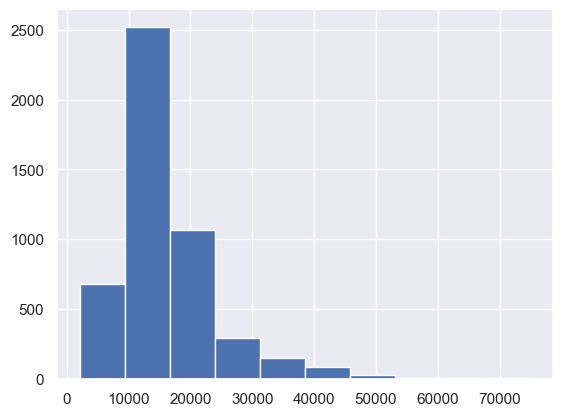

In [99]:
# Verificamos
bmw4["precio"].hist()

###ANÁLISIS Y DECISIÓN SOBRE NULOS###

In [100]:
bmw4.isnull().sum()
# Tenemos nulos en casi todas las columnas, salvo la columna gps

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
tiempo_venta                   2423
dtype: int64

In [101]:
bmw4["modelo"].value_counts()

modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

<Axes: >

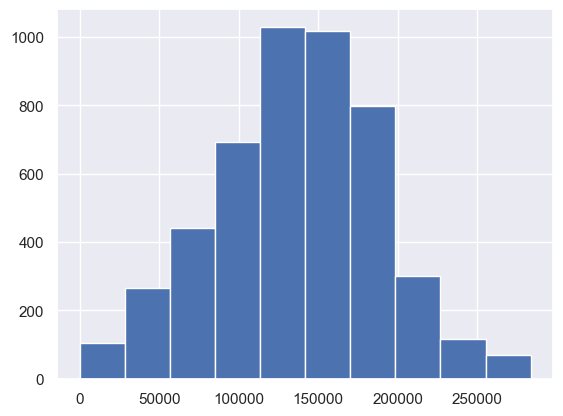

In [102]:
# Histograma de la columna km,  tiene ahora distribucion normal
bmw4["km"].hist()

<Axes: >

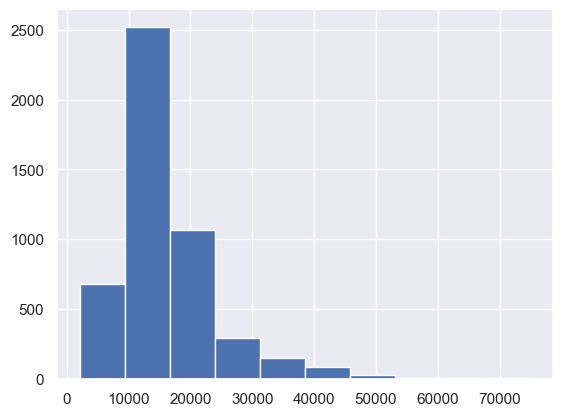

In [103]:
# Histograma de la columna precio,  tiene ahora una forma de distribución normal. 
bmw4["precio"].hist()

In [104]:
# No hay negativos en el precio, o igual a 0
bmw4[bmw4["precio"] <= 0]

Empty DataFrame
Columns: [marca, modelo, km, potencia, fecha_registro, tipo_gasolina, color, tipo_coche, volante_regulable, aire_acondicionado, camara_trasera, asientos_traseros_plegables, elevalunas_electrico, bluetooth, gps, alerta_lim_velocidad, precio, fecha_venta, tiempo_venta]
Index: []

<Axes: >

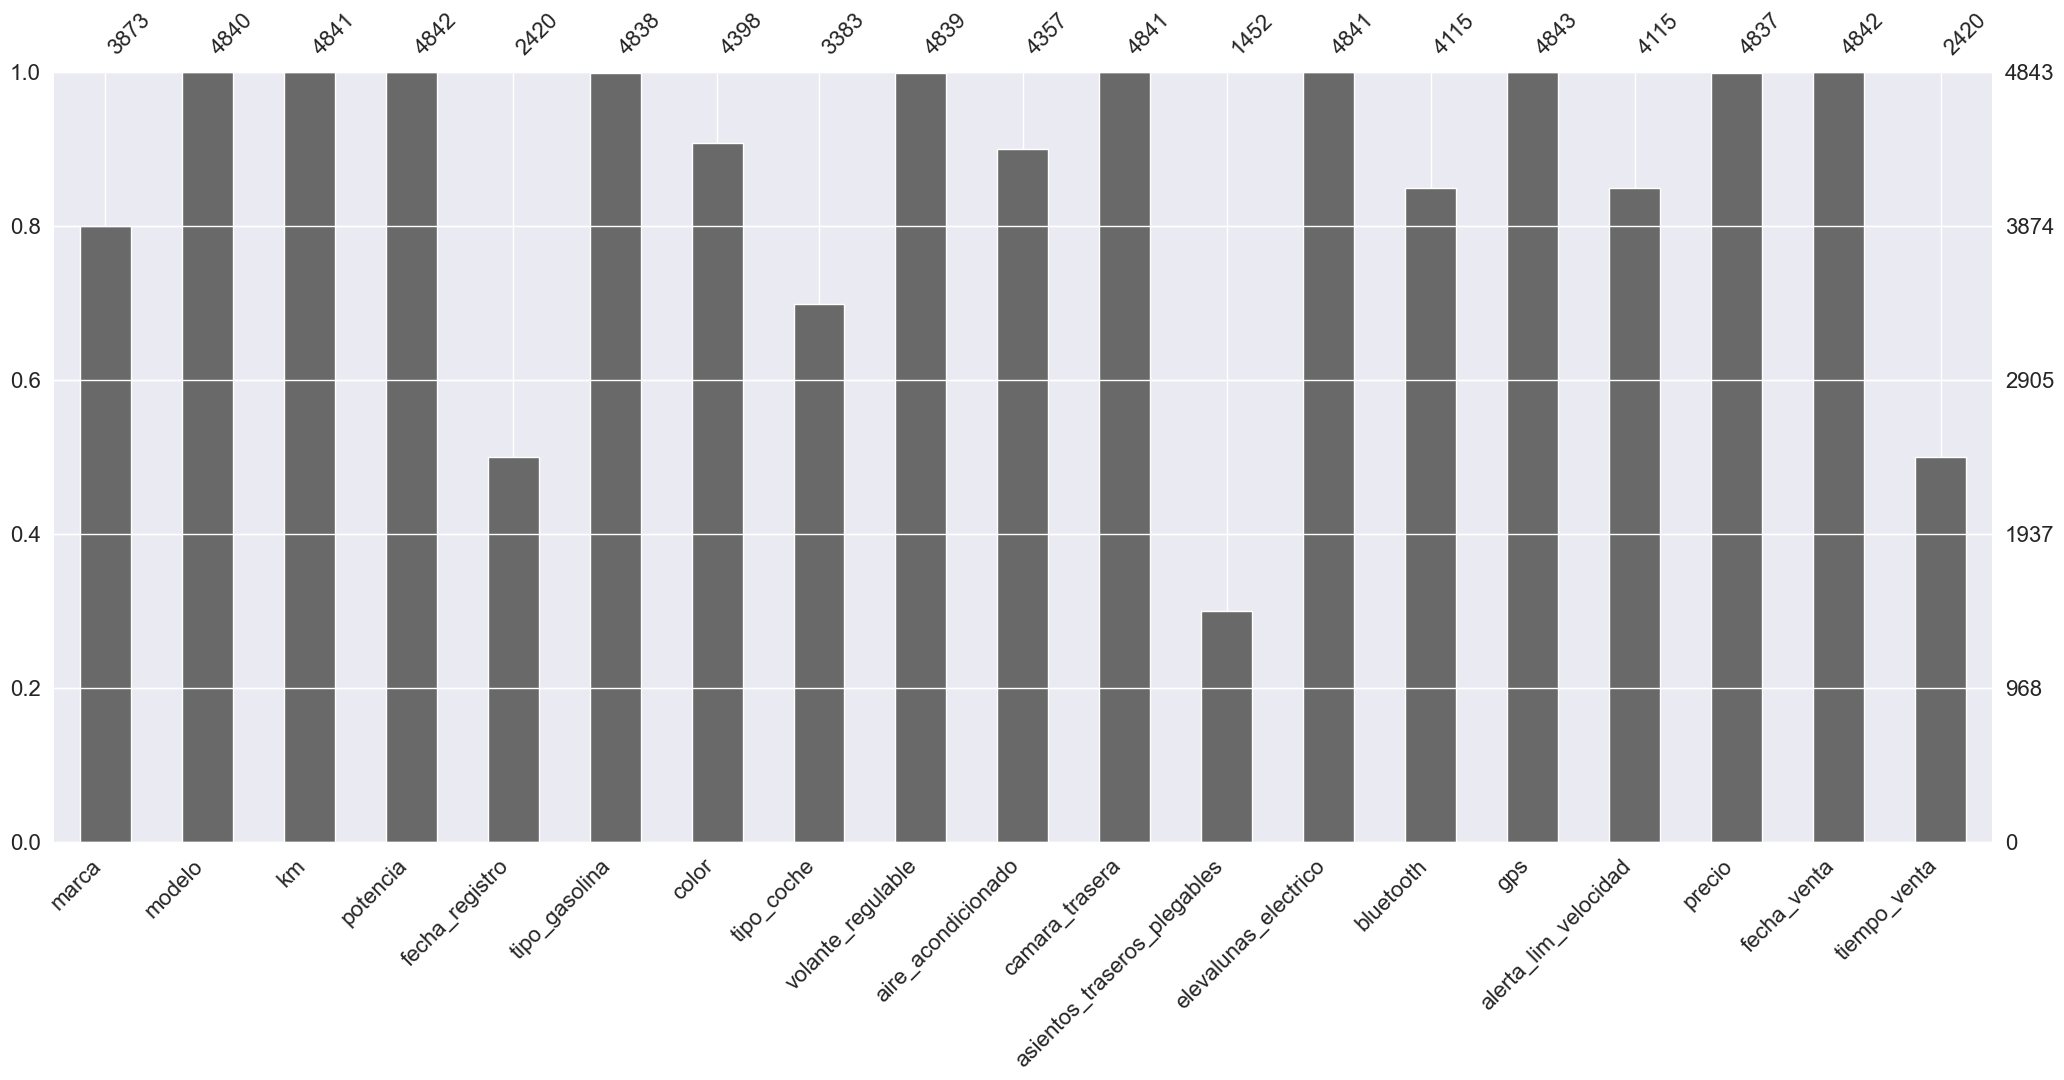

In [105]:
# Veamos la distribución de nulos en nuestro dataset con la librería missingno. Funcion bar
msno.bar (bmw4)

<Axes: >

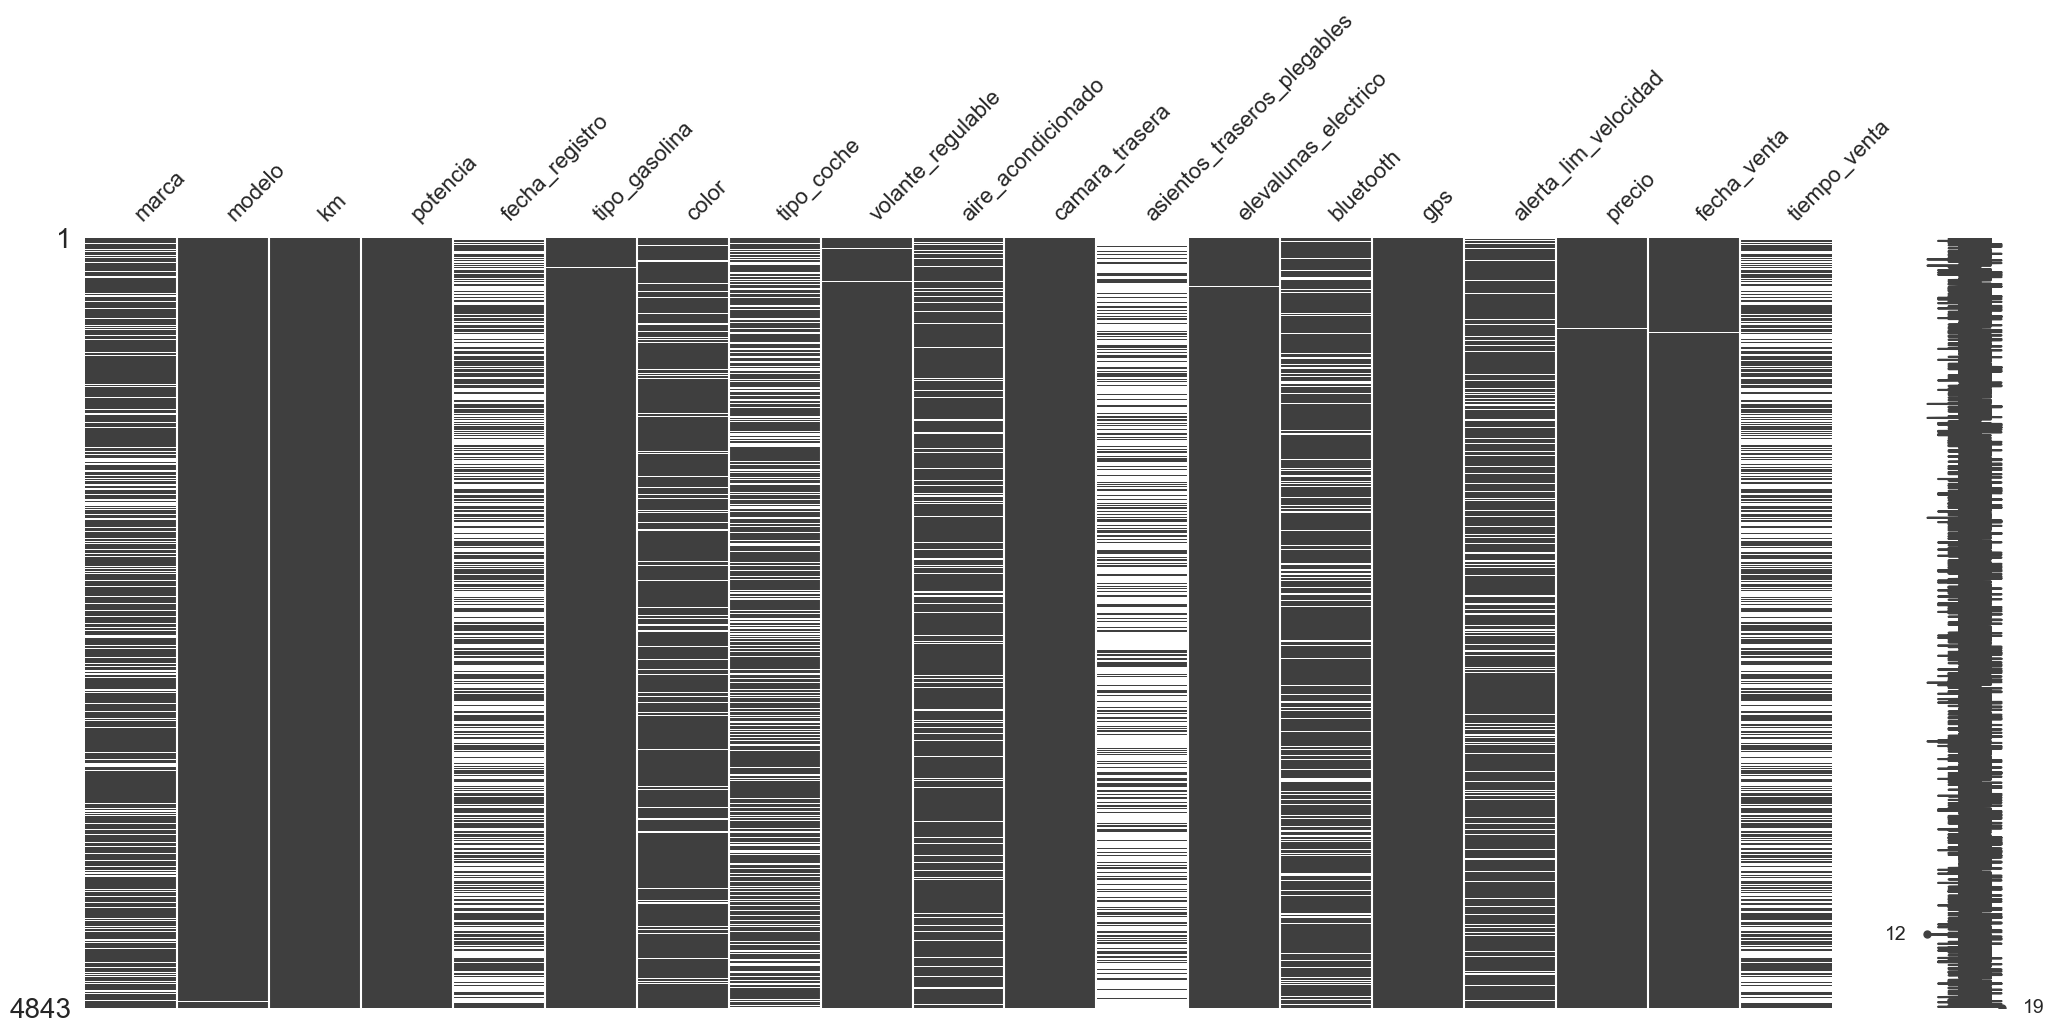

In [106]:
# Funcion matrix
msno.matrix (bmw4)

<Axes: >

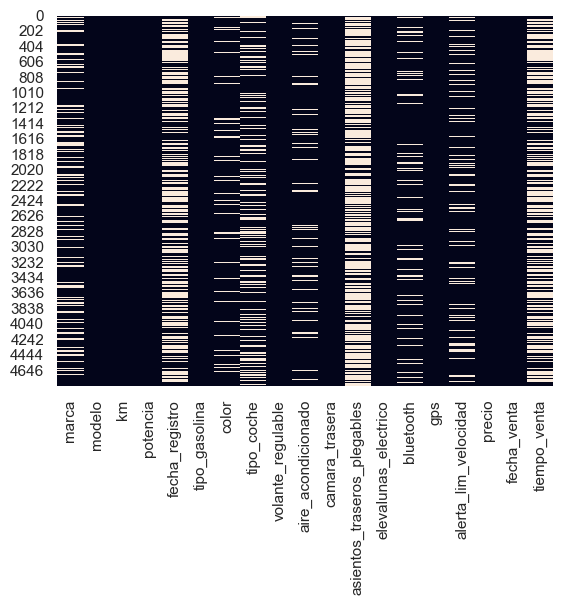

In [107]:
# Funcion heatmap
sns.heatmap(bmw4.isnull(), cbar=False)

<Axes: >

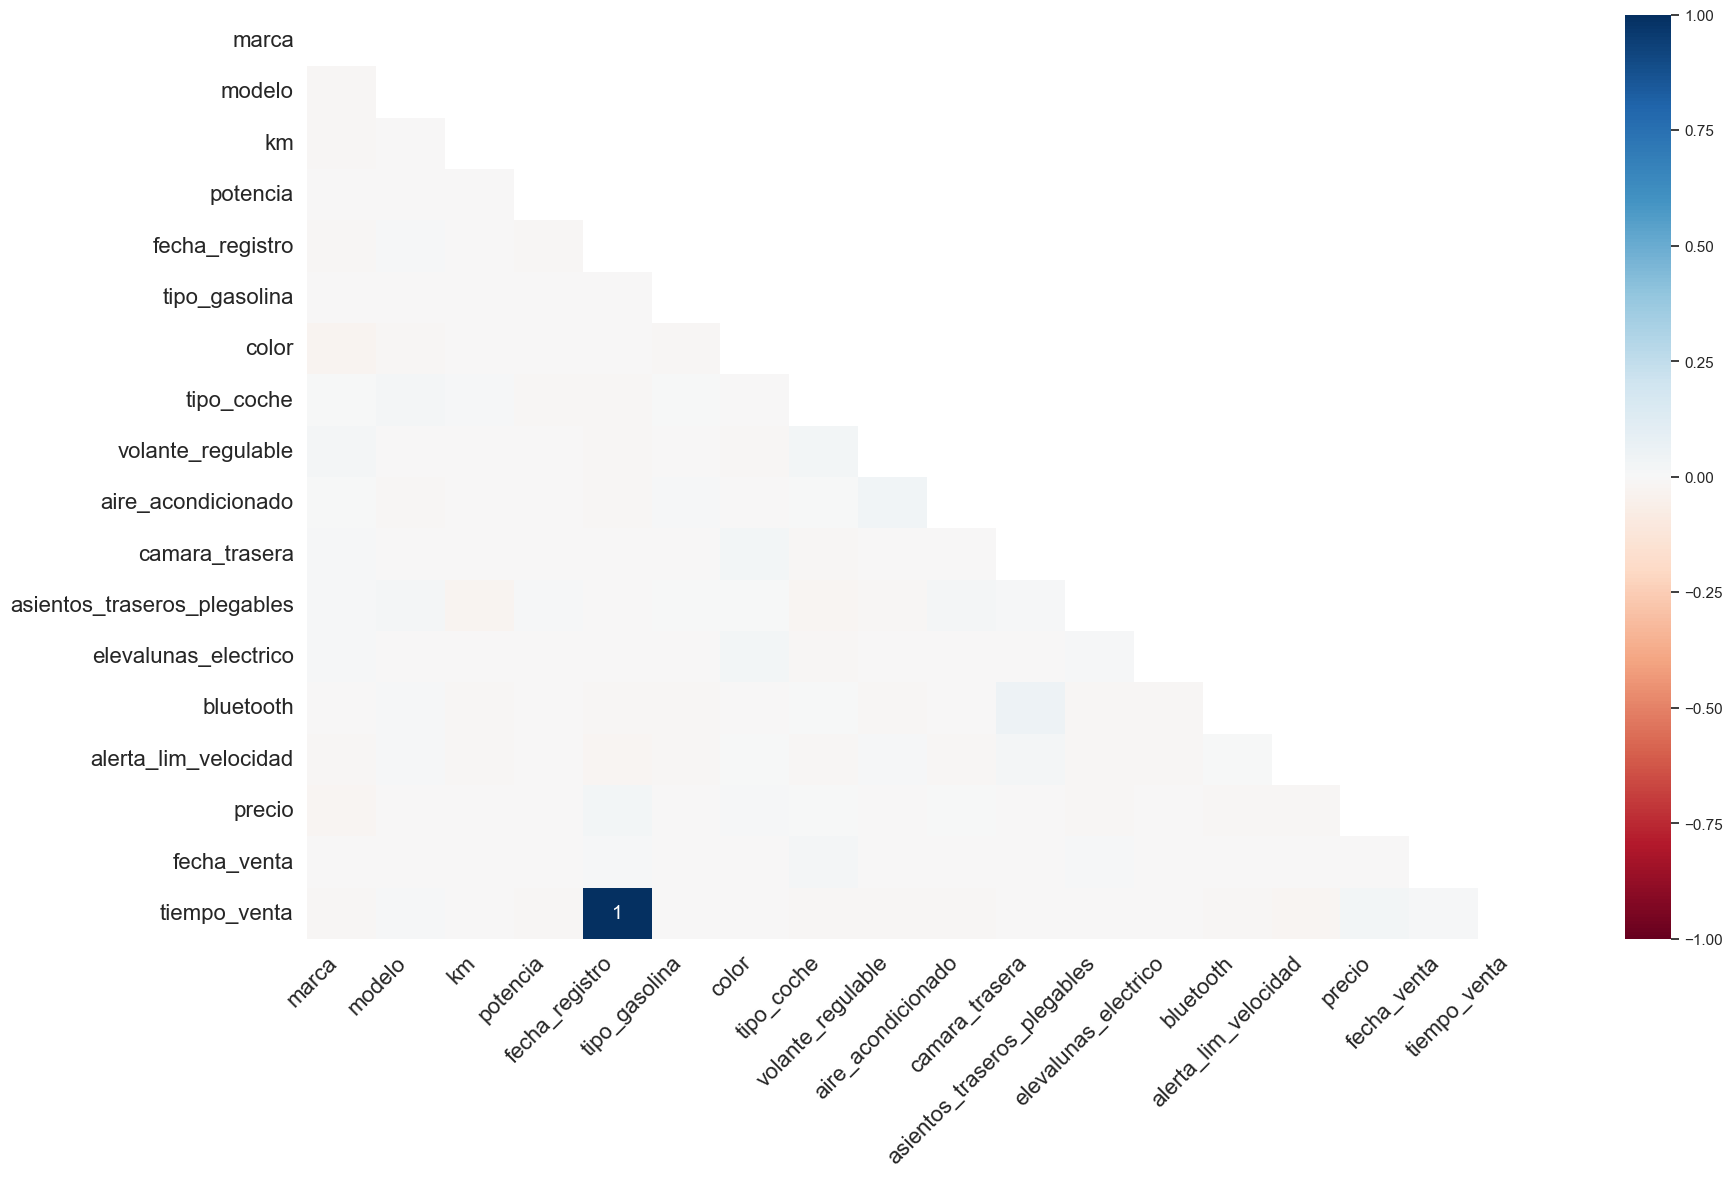

In [108]:
# Funcion heatmap
msno.heatmap(bmw4)

<Axes: >

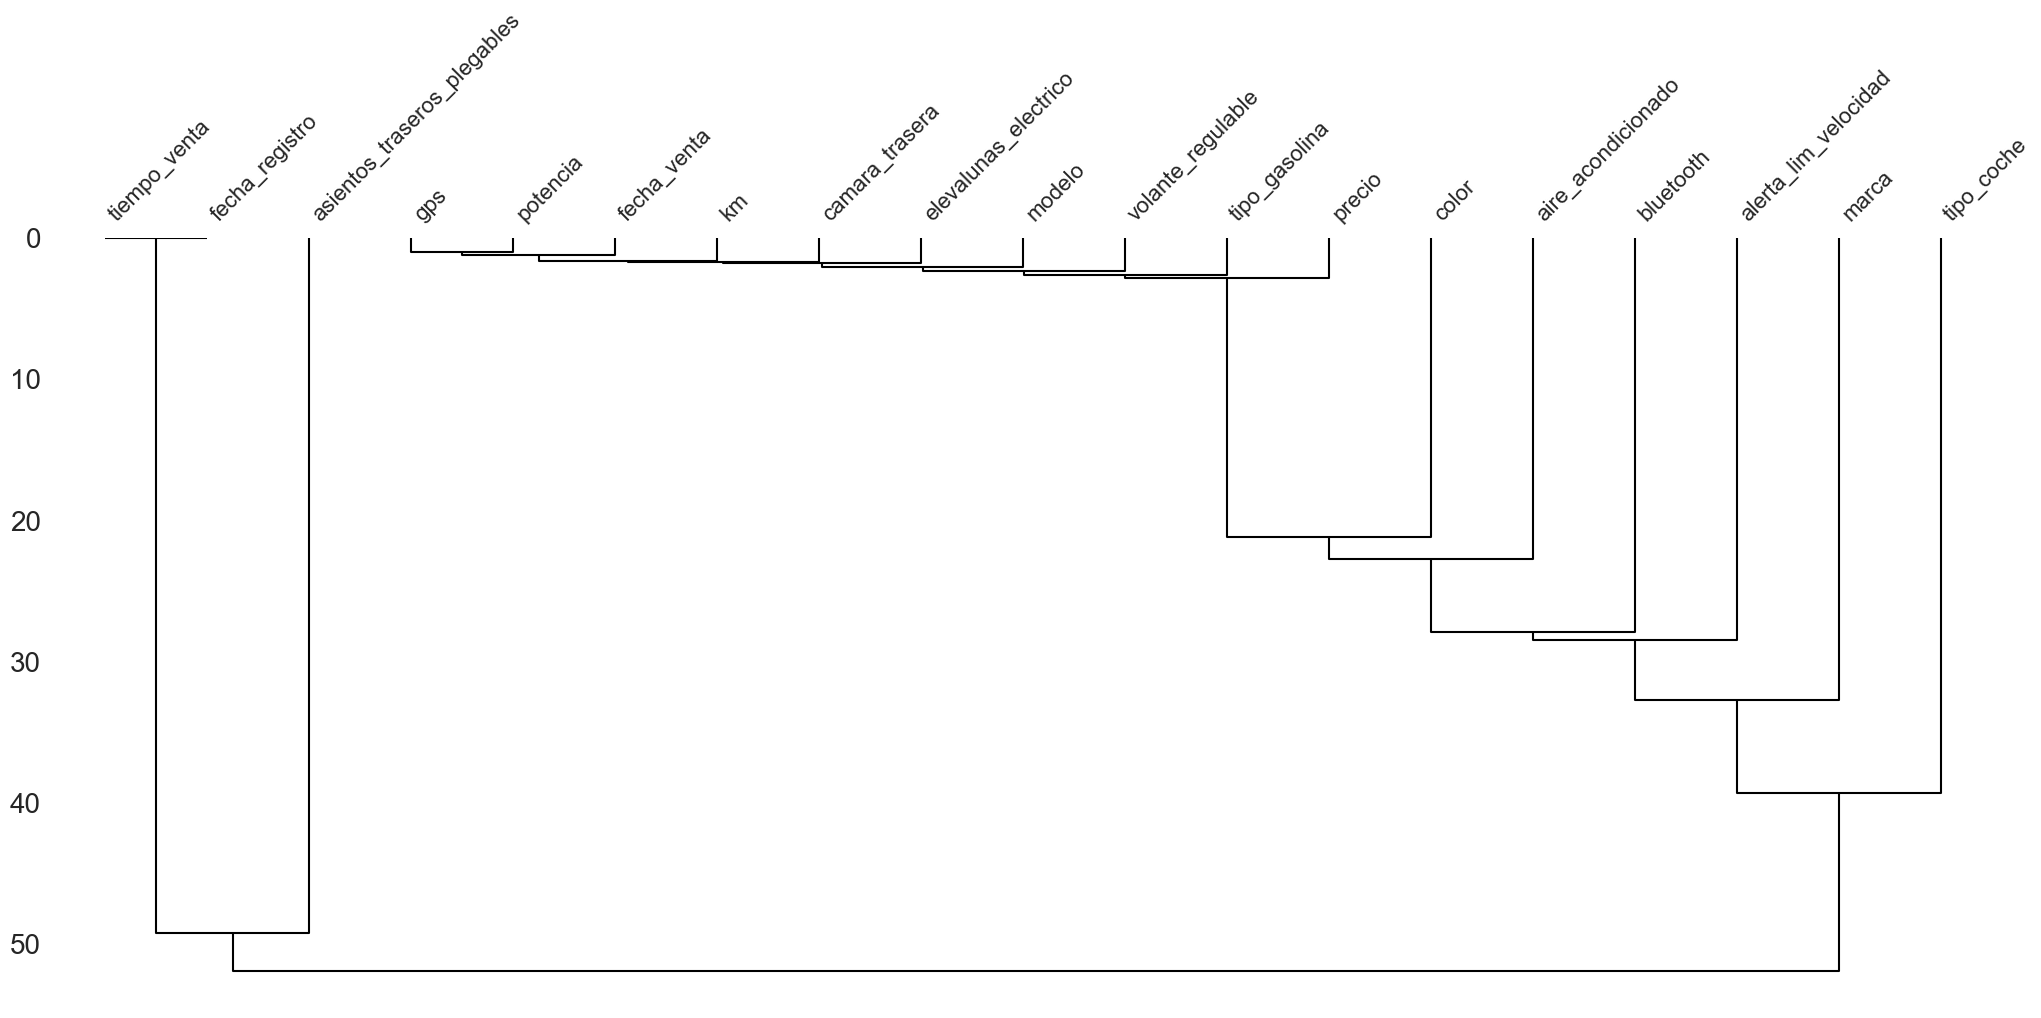

In [109]:
# Funcion dendrogram
msno.dendrogram (bmw4)

In [110]:
bmw5 = bmw4.copy()

In [111]:
# Los nulos en:
# - Marca: no tenemos claro que sean de la marca BMW, se podrían cambiar a "BMW"
# - Modelo: hay 3 nulos en Modelo, que se podrían eliminar - NULOS ELIMINAR
# - km: se podría hacer una mediana
# - potencia: se podría hacer una mediana
# - tipo_gasolina: Cambiar a "sin_tipo_gasolina"
# - color: Cambiar a "sin_color"
# - tipo_coche: Cambiar a "sin_tipo_coche"
# - volante_regulable: se podrían eliminar - NULOS ELIMINAR
# - aire_acondicionado: se podrían cambiar a -1 
# - camara_trasera: se podrían eliminar - NULOS ELIMINAR
# - asientos_traseros_plegables: Demasiados nulos, más del 50%, decido ELIMINAR COLUMNA 
# - elevalunas_electrico: se podrían eliminar - NULOS ELIMINAR
# - bluetooth: se podrían cambiar a -1 
# - alerta_lim_velocidad: se podrían cambiar a -1 

# - tiempo de venta, los nulos los cambiamos a mediana

# - precio: los he cambiado por el valor de la mediana


- Modelo

In [112]:
# Calculando porcentaje de nulos de modelo
(bmw5["modelo"].isnull().sum()/bmw5.shape[0])*100

0.06194507536650836

In [113]:
# Quiero saber el total de nulos de la columna modelo
bmw5["modelo"].isnull().sum()

3

In [114]:
# Decido eliminar estas 3 filas
bmw5.dropna(subset=["modelo"], inplace=True)

In [115]:
# Verificación
bmw5["modelo"].isnull().sum()

0

 - km

In [116]:
# Calculando porcentaje de nulos de km
(bmw5["km"].isnull().sum()/bmw5.shape[0])*100

0.04132231404958678

In [117]:
# Quiero saber el total de nulos de la columna km
bmw5["km"].isnull().sum()

2

In [118]:
bmw5["km"].describe()

count      4838.000000
mean     136990.029351
std       51927.416234
min         -64.000000
25%      102863.000000
50%      141080.000000
75%      172202.500000
max      283612.000000
Name: km, dtype: float64

In [119]:
# Decido poner en los dos nulos el valor de la mediana de km
bmw5["km"].fillna(bmw5["km"].median(), inplace=True)

In [120]:
# Verificación
bmw5["km"].isnull().sum()

0

- potencia

In [121]:
# Calculando porcentaje de nulos de potencia
(bmw5["potencia"].isnull().sum()/bmw5.shape[0])*100

0.02066115702479339

In [122]:
# Quiero saber el total de nulos de la columna potencia
bmw5["potencia"].isnull().sum()

1

In [123]:
bmw5["potencia"].describe()

count    4839.000000
mean      117.943377
std        21.468679
min        66.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       183.000000
Name: potencia, dtype: float64

In [124]:
# Decido poner en el nulo el valor de la mediana de potencia
bmw5["potencia"].fillna(bmw5["potencia"].median(), inplace=True)

In [125]:
# Verificación
bmw5["potencia"].isnull().sum()

0

tiempo_venta

In [126]:
bmw5.head()

marca modelo        km  potencia fecha_registro tipo_gasolina   color  \
0   NaN    118  140411.0     100.0     2012-02-01        diesel   black   
1   BMW     M4   13929.0     120.0            NaT        petrol    grey   
2   BMW    320  183297.0     120.0     2012-04-01        diesel   white   
3   BMW    420  128035.0     135.0            NaT        diesel     red   
4   BMW    425   97097.0     160.0            NaT        diesel  silver   

    tipo_coche volante_regulable aire_acondicionado camara_trasera  \
0          NaN              True               True          False   
1  convertible              True               True          False   
2          NaN             False              False          False   
3  convertible              True               True          False   
4          NaN              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio fecha_venta tiempo_venta  
0                  NaN  11300.0  2018-01-01    2161 days  
1                 True  69700.0  2018-02-01          NaT  
2                False  10200.0  2018-02-01    2132 days  
3                  NaN  25100.0  2018-02-01          NaT  
4                 True  33400.0  2018-04-01          NaT

In [127]:
# eliminamos columnas de fechas
del bmw5["fecha_registro"]

In [128]:
del bmw5["fecha_venta"]

In [129]:
bmw5.head()

marca modelo        km  potencia tipo_gasolina   color   tipo_coche  \
0   NaN    118  140411.0     100.0        diesel   black          NaN   
1   BMW     M4   13929.0     120.0        petrol    grey  convertible   
2   BMW    320  183297.0     120.0        diesel   white          NaN   
3   BMW    420  128035.0     135.0        diesel     red  convertible   
4   BMW    425   97097.0     160.0        diesel  silver          NaN   

  volante_regulable aire_acondicionado camara_trasera  \
0              True               True          False   
1              True               True          False   
2             False              False          False   
3              True               True          False   
4              True               True          False   

  asientos_traseros_plegables elevalunas_electrico bluetooth   gps  \
0                         NaN                 True       NaN  True   
1                         NaN                False      True  True   
2                         NaN                 True     False  True   
3                         NaN                 True      True  True   
4                       False                False      True  True   

  alerta_lim_velocidad   precio tiempo_venta  
0                  NaN  11300.0    2161 days  
1                 True  69700.0          NaT  
2                False  10200.0    2132 days  
3                  NaN  25100.0          NaT  
4                 True  33400.0          NaT

In [130]:
# Calculando porcentaje de nulos de tiempo_venta
(bmw5["tiempo_venta"].isnull().sum()/bmw5.shape[0])*100

50.02066115702479

In [131]:
# Cambio los nulos a su mediana
bmw5["tiempo_venta"].fillna(bmw5["tiempo_venta"].median(), inplace=True)

In [132]:
# Verificación
bmw5["tiempo_venta"].isnull().sum()

0

In [133]:
bmw5.head(20)

marca modelo        km  potencia tipo_gasolina   color   tipo_coche  \
0    NaN    118  140411.0     100.0        diesel   black          NaN   
1    BMW     M4   13929.0     120.0        petrol    grey  convertible   
2    BMW    320  183297.0     120.0        diesel   white          NaN   
3    BMW    420  128035.0     135.0        diesel     red  convertible   
4    BMW    425   97097.0     160.0        diesel  silver          NaN   
5    BMW    335  152352.0     120.0        petrol   black          NaN   
6    BMW    325  205219.0     145.0        diesel    grey  convertible   
7    BMW    118  115560.0     105.0        petrol   white  convertible   
8    NaN     Z4  123886.0     125.0        petrol   black  convertible   
9    BMW    320  139541.0     135.0        diesel   white  convertible   
10   BMW    320   77115.0     135.0        diesel    blue  convertible   
11   NaN    325  228000.0     145.0        diesel   black          NaN   
12   BMW    420  132025.0     135.0        diesel    blue          NaN   
13   BMW    420   77061.0     135.0        diesel   black          NaN   
14   BMW    120  174631.0     120.0        diesel     NaN  convertible   
15   BMW    120  208945.0     130.0        diesel    grey  convertible   
16   BMW    220   21167.0     135.0        petrol   white  convertible   
17   BMW    650   24521.0     120.0        petrol    grey  convertible   
18   NaN    325  205474.0     145.0        diesel     NaN          NaN   
19   BMW     Z4  128940.0     110.0        petrol   black          NaN   

   volante_regulable aire_acondicionado camara_trasera  \
0               True               True          False   
1               True               True          False   
2              False              False          False   
3               True               True          False   
4               True               True          False   
5               True               True          False   
6               True               True          False   
7               True               True          False   
8               True              False          False   
9              False              False          False   
10              True               True          False   
11              True               True          False   
12              True                NaN          False   
13              True               True          False   
14              True               True          False   
15              True               True          False   
16             False                NaN           True   
17              True              False          False   
18              True               True          False   
19              True              False          False   

   asientos_traseros_plegables elevalunas_electrico bluetooth    gps  \
0                          NaN                 True       NaN   True   
1                          NaN                False      True   True   
2                          NaN                 True     False   True   
3                          NaN                 True      True   True   
4                        False                False      True   True   
5                        False                 True      True   True   
6                          NaN                 True      True   True   
7                          NaN                False      True   True   
8                        False                False       NaN   True   
9                          NaN                 True     False   True   
10                         NaN                 True     False   True   
11                       False                 True     False   True   
12                       False                 True      True   True   
13                         NaN                 True      True   True   
14                       False                False     False   True   
15                         NaN                 True     False   True   
16   

- tipo_gasolina

In [134]:
# Calculando porcentaje de nulos de tipo_gasolina
(bmw5["tipo_gasolina"].isnull().sum()/bmw5.shape[0])*100

0.10330578512396695

In [135]:
# Cambio los nulos a "sin_tipo_gasolina"
bmw5["tipo_gasolina"].fillna("sin_tipo_gasolina", inplace=True)

In [136]:
# Verificación
bmw5["tipo_gasolina"].isnull().sum()

0

- color

In [137]:
# Calculando porcentaje de nulos de color
(bmw5["color"].isnull().sum()/bmw5.shape[0])*100

9.194214876033058

In [138]:
# Cambio los nulos a "sin_color"
bmw5["color"].fillna("sin_color", inplace=True)

In [139]:
# Verificación
bmw5["color"].isnull().sum()

0

- tipo_coche

In [140]:
# Calculando porcentaje de nulos de tipo_coche
(bmw5["tipo_coche"].isnull().sum()/bmw5.shape[0])*100

30.123966942148762

In [141]:
# Cambio los nulos a "sin_tipo_coche"
bmw5["tipo_coche"].fillna("sin_tipo_coche", inplace=True)

In [142]:
# Verificación
bmw5["tipo_coche"].isnull().sum()

0

- volante_regulable

In [143]:
# Calculando porcentaje de nulos de volante_regulable
(bmw5["volante_regulable"].isnull().sum()/bmw5.shape[0])*100

0.08264462809917356

In [144]:
# Quiero saber el total de nulos de volante_regulable
bmw5["volante_regulable"].isnull().sum()

4

In [145]:
# Decido eliminar estas 4 filas
bmw5.dropna(subset=["volante_regulable"], inplace=True)

In [146]:
# Verificación
bmw5["volante_regulable"].isnull().sum()

0

- aire_acondicionado

In [147]:
# Calculando porcentaje de nulos de aire_acondicionado
(bmw5["aire_acondicionado"].isnull().sum()/bmw5.shape[0])*100

10.008271298593879

In [148]:
# Quiero saber el total de nulos de aire_acondicionado
bmw5["aire_acondicionado"].isnull().sum()

484

In [149]:
# Cambio los nulos a "-1"
bmw5["aire_acondicionado"].fillna(-1, inplace=True)

In [150]:
# Verificación
bmw5["aire_acondicionado"].isnull().sum()

0

- camara_trasera

In [151]:
# Calculando porcentaje de nulos de aire_acondicionado
(bmw5["camara_trasera"].isnull().sum()/bmw5.shape[0])*100

0.0413564929693962

In [152]:
# Quiero saber el total de nulos de camara_trasera
bmw5["camara_trasera"].isnull().sum()

2

In [153]:
# Decido eliminar estas 2 filas
bmw5.dropna(subset=["camara_trasera"], inplace=True)

In [154]:
# Verificación
bmw5["camara_trasera"].isnull().sum()

0

- asientos_traseros_plegables


In [155]:
# Calculando porcentaje de nulos de asientos_traseros_plegables
(bmw5["asientos_traseros_plegables"].isnull().sum()/bmw5.shape[0])*100

70.00413736036408

In [156]:
# El porcentaje de nulos es muy alto, decido eliminar la columna entera
del(bmw5["asientos_traseros_plegables"])

- elevalunas_electrico

In [157]:
# Calculando porcentaje de nulos de elevalunas_electrico
(bmw5["elevalunas_electrico"].isnull().sum()/bmw5.shape[0])*100

0.04137360364087712

In [158]:
# Quiero saber el total de nulos de camara_trasera
bmw5["elevalunas_electrico"].isnull().sum()

2

In [159]:
# Decido eliminar estas 2 filas
bmw5.dropna(subset=["elevalunas_electrico"], inplace=True)

In [160]:
# Verificación
bmw5["elevalunas_electrico"].isnull().sum()

0

- bluetooth

In [161]:
# Calculando porcentaje de nulos de bluetooth
(bmw5["bluetooth"].isnull().sum()/bmw5.shape[0])*100

15.004139072847684

In [162]:
# Quiero saber el total de nulos de bluetooth
bmw5["bluetooth"].isnull().sum()

725

In [163]:
# Cambio los nulos a "-1"
bmw5["bluetooth"].fillna(-1, inplace=True)

In [164]:
# Verificación
bmw5["bluetooth"].isnull().sum()

0

- alerta_lim_velocidad


In [165]:
# Calculando porcentaje de nulos de alerta_lim_velocidad
(bmw5["alerta_lim_velocidad"].isnull().sum()/bmw5.shape[0])*100

15.004139072847684

In [166]:
# Quiero saber el total de nulos de bluetooth
bmw5["alerta_lim_velocidad"].isnull().sum()

725

In [167]:
# Cambio los nulos a "-1"
bmw5["alerta_lim_velocidad"].fillna(-1, inplace=True)

In [168]:
# Verificación
bmw5["alerta_lim_velocidad"].isnull().sum()

0

- precio

In [169]:
# Calculando porcentaje de nulos de fecha_venta
(bmw5["precio"].isnull().sum()/bmw5.shape[0])*100

0.12417218543046359

In [170]:
# Quiero saber el total de nulos de precio
bmw5["precio"].isnull().sum()

6

In [171]:
bmw5["precio"].describe()

count     4826.000000
mean     16010.277663
std       8338.978084
min       2100.000000
25%      11100.000000
50%      14200.000000
75%      18600.000000
max      75000.000000
Name: precio, dtype: float64

<Axes: >

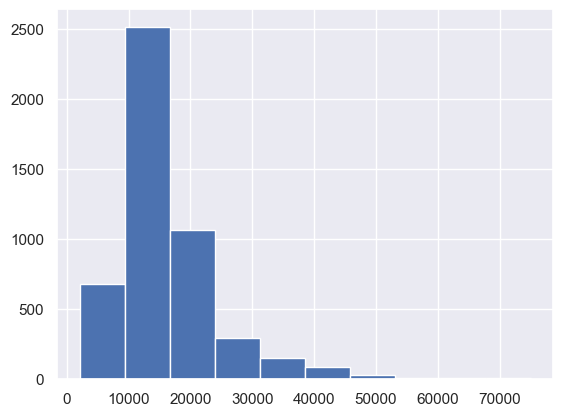

In [172]:
# Cuando cambie el valor de los nulos, tener en cuenta que la mediana se pone cuando hay mucha diversificacion de los datos
bmw5["precio"].hist()

In [173]:
# Decido cambiar los nulos por el valor de la mediana del precio. 
# Tengo dudas de si es buena idea imputar a los nulos por un valor, cuando se trata del target. Igual es mejor eliminar nulos, sin cambiar su valor. 
bmw5["precio"].fillna(bmw5["precio"].median(), inplace=True)

In [174]:
# Verificación
bmw5["precio"].isnull().sum()

0

ELIMINAR COLUMNAS

In [175]:
# Hacemos una copia
bmw6=bmw5.copy()

In [176]:
# Ya hemos eliminado una columna "asientos_traseros_plegables"

In [177]:
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   marca                 3866 non-null   object         
 1   modelo                4832 non-null   object         
 2   km                    4832 non-null   float64        
 3   potencia              4832 non-null   float64        
 4   tipo_gasolina         4832 non-null   object         
 5   color                 4832 non-null   object         
 6   tipo_coche            4832 non-null   object         
 7   volante_regulable     4832 non-null   object         
 8   aire_acondicionado    4832 non-null   object         
 9   camara_trasera        4832 non-null   object         
 10  elevalunas_electrico  4832 non-null   object         
 11  bluetooth             4832 non-null   object         
 12  gps                   4832 non-null   bool           
 13  alerta_l

In [178]:
# Decido eliminar la columna de marca, ya que son todos "BMW"
del(bmw6["marca"])

In [179]:
# Verificamos
bmw6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   km                    4832 non-null   float64        
 2   potencia              4832 non-null   float64        
 3   tipo_gasolina         4832 non-null   object         
 4   color                 4832 non-null   object         
 5   tipo_coche            4832 non-null   object         
 6   volante_regulable     4832 non-null   object         
 7   aire_acondicionado    4832 non-null   object         
 8   camara_trasera        4832 non-null   object         
 9   elevalunas_electrico  4832 non-null   object         
 10  bluetooth             4832 non-null   object         
 11  gps                   4832 non-null   bool           
 12  alerta_lim_velocidad  4832 non-null   object         
 13  precio  

AGRUPAR COLUMANS

In [180]:
# Analizo
bmw6.head()

modelo        km  potencia tipo_gasolina   color      tipo_coche  \
0    118  140411.0     100.0        diesel   black  sin_tipo_coche   
1     M4   13929.0     120.0        petrol    grey     convertible   
2    320  183297.0     120.0        diesel   white  sin_tipo_coche   
3    420  128035.0     135.0        diesel     red     convertible   
4    425   97097.0     160.0        diesel  silver  sin_tipo_coche   

  volante_regulable aire_acondicionado camara_trasera elevalunas_electrico  \
0              True               True          False                 True   
1              True               True          False                False   
2             False              False          False                 True   
3              True               True          False                 True   
4              True               True          False                False   

  bluetooth   gps alerta_lim_velocidad   precio tiempo_venta  
0        -1  True                   -1  11300.0    2161 days  
1      True  True                 True  69700.0    1767 days  
2     False  True                False  10200.0    2132 days  
3      True  True                   -1  25100.0    1767 days  
4      True  True                 True  33400.0    1767 days

In [181]:
# Hay algo que vea que se deba agrupar? ¿Podria agrupar marca y modelo?
# Decidimos no agrupar ninguna columna

CORRELACION INTERMADIA: DETECTAR SI HAY VARIABLES QUE EXPLICAN LO MISMO

In [182]:
# Análisis de Correlación intermedia, hay alguna variable correlacionada?

In [183]:
# Hacemos una copia
bmw7=bmw6.copy()

In [184]:
# Hacemos una correlación para detectar si hay variables que explican lo mismo (lo va a hacer solamente con numericos)
corr = bmw7.corr(numeric_only=True)

In [185]:
# o se observa una correlación directa inicial entre los diferentes campos
# hay poca relacion entre precio y km, o precio y gps.
# Hay un poco de relacion entre potencia y precio
corr.style.background_gradient(cmap="coolwarm")

In [186]:
# Hacemos una copia
bmw8=bmw7.copy()

In [187]:
# verificamos
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   km                    4832 non-null   float64        
 2   potencia              4832 non-null   float64        
 3   tipo_gasolina         4832 non-null   object         
 4   color                 4832 non-null   object         
 5   tipo_coche            4832 non-null   object         
 6   volante_regulable     4832 non-null   object         
 7   aire_acondicionado    4832 non-null   object         
 8   camara_trasera        4832 non-null   object         
 9   elevalunas_electrico  4832 non-null   object         
 10  bluetooth             4832 non-null   object         
 11  gps                   4832 non-null   bool           
 12  alerta_lim_velocidad  4832 non-null   object         
 13  precio  

In [188]:
# lnum = ["km", "potencia", "tiempo_venta_int"]
# lbool = ["volante_regulable", "aire_acondicionado", "camara_trasera", "elevalunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad" ]
# lcat = ["modelo", "tipo_gasolina", "color", "tipo_coche"]

CAMBIAMOS LOS DTYPE PARA OBTENER lnum, lbool, lcat

- lnum

In [189]:
# km y potencia, los dejamos como float
# tiempo_venta cambiarlo a int

In [190]:
# Transformo la columna de tiempo_venta a segundos, para tener un numerico
bmw8["tiempo_venta_int"] = bmw8["tiempo_venta"]/np.timedelta64(1, 's')

In [191]:
bmw8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   modelo                4832 non-null   object         
 1   km                    4832 non-null   float64        
 2   potencia              4832 non-null   float64        
 3   tipo_gasolina         4832 non-null   object         
 4   color                 4832 non-null   object         
 5   tipo_coche            4832 non-null   object         
 6   volante_regulable     4832 non-null   object         
 7   aire_acondicionado    4832 non-null   object         
 8   camara_trasera        4832 non-null   object         
 9   elevalunas_electrico  4832 non-null   object         
 10  bluetooth             4832 non-null   object         
 11  gps                   4832 non-null   bool           
 12  alerta_lim_velocidad  4832 non-null   object         
 13  precio  

In [192]:
bmw8.head()

modelo        km  potencia tipo_gasolina   color      tipo_coche  \
0    118  140411.0     100.0        diesel   black  sin_tipo_coche   
1     M4   13929.0     120.0        petrol    grey     convertible   
2    320  183297.0     120.0        diesel   white  sin_tipo_coche   
3    420  128035.0     135.0        diesel     red     convertible   
4    425   97097.0     160.0        diesel  silver  sin_tipo_coche   

  volante_regulable aire_acondicionado camara_trasera elevalunas_electrico  \
0              True               True          False                 True   
1              True               True          False                False   
2             False              False          False                 True   
3              True               True          False                 True   
4              True               True          False                False   

  bluetooth   gps alerta_lim_velocidad   precio tiempo_venta  tiempo_venta_int  
0        -1  True                   -1  11300.0    2161 days       186710400.0  
1      True  True                 True  69700.0    1767 days       152668800.0  
2     False  True                False  10200.0    2132 days       184204800.0  
3      True  True                   -1  25100.0    1767 days       152668800.0  
4      True  True                 True  33400.0    1767 days       152668800.0

In [193]:
del bmw8["tiempo_venta"]

 - lbool

In [194]:
bmw9=bmw8.copy()

In [195]:
bmw9["volante_regulable_int"]=np.where(bmw9["volante_regulable"]==True,1,0 )

In [196]:
bmw9["aire_acondicionado_int"]=np.where(bmw9["aire_acondicionado"]==True,1,0 )

In [197]:
bmw9["camara_trasera_int"]=np.where(bmw9["camara_trasera"]==True,1,0)

In [198]:
bmw9["elevalunas_electrico_int"]=np.where(bmw9["elevalunas_electrico"]==True,1,0)

In [199]:
bmw9["bluetooth_int"]=np.where(bmw9["bluetooth"]==True,1,0)

In [200]:
bmw9["gps_int"]=np.where(bmw9["gps"]==True,1,0)

In [201]:
bmw9["alerta_lim_velocidad_int"]=np.where(bmw9["alerta_lim_velocidad"]==True,1,0)

In [202]:
bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4832 non-null   object 
 1   km                        4832 non-null   float64
 2   potencia                  4832 non-null   float64
 3   tipo_gasolina             4832 non-null   object 
 4   color                     4832 non-null   object 
 5   tipo_coche                4832 non-null   object 
 6   volante_regulable         4832 non-null   object 
 7   aire_acondicionado        4832 non-null   object 
 8   camara_trasera            4832 non-null   object 
 9   elevalunas_electrico      4832 non-null   object 
 10  bluetooth                 4832 non-null   object 
 11  gps                       4832 non-null   bool   
 12  alerta_lim_velocidad      4832 non-null   object 
 13  precio                    4832 non-null   float64
 14  tiempo_venta_

In [203]:
del bmw9["volante_regulable"] 

In [204]:
del bmw9["aire_acondicionado"] 


In [205]:
del bmw9["camara_trasera"] 

In [206]:
del bmw9["elevalunas_electrico"] 

In [207]:
del bmw9["bluetooth"]

In [208]:
del bmw9["gps"]  

In [209]:
del bmw9["alerta_lim_velocidad"]

In [210]:
bmw9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4832 non-null   object 
 1   km                        4832 non-null   float64
 2   potencia                  4832 non-null   float64
 3   tipo_gasolina             4832 non-null   object 
 4   color                     4832 non-null   object 
 5   tipo_coche                4832 non-null   object 
 6   precio                    4832 non-null   float64
 7   tiempo_venta_int          4832 non-null   float64
 8   volante_regulable_int     4832 non-null   int32  
 9   aire_acondicionado_int    4832 non-null   int32  
 10  camara_trasera_int        4832 non-null   int32  
 11  elevalunas_electrico_int  4832 non-null   int32  
 12  bluetooth_int             4832 non-null   int32  
 13  gps_int                   4832 non-null   int32  
 14  alerta_lim_ve

In [211]:
bmw9["camara_trasera_int"].dtype.kind

'i'

- lcat

In [212]:
# modelo, tipo_gasolina, color y tipo_coche ya son objects, ya podemos aplicar la formula

SEPARAMOS NUESTRAS VARIABLES EN TARGET, NUMERICAS, BOOLEANAS Y CATEGORICAS

In [213]:
target=["precio"]
def obtener_lista_variables(dataset):
  lista_numericas=[]
  lista_boolean=[]
  lista_categoricas=[]

  for i in dataset:
    if((dataset[i].dtype.kind=="i") or (dataset[i].dtype.kind=="f")) and i not in target and len(dataset[i].unique())!=2:
      lista_numericas.append(i)
    elif(dataset[i].dtype.kind=="i") and i not in target and len(dataset[i].unique())==2:
      lista_boolean.append(i)
    elif(dataset[i].dtype.kind=="O") and i not in target:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [214]:
lnum, lbool, lcat = obtener_lista_variables(bmw9)

In [215]:
lnum

['km', 'potencia', 'tiempo_venta_int']

In [216]:
lbool

['volante_regulable_int',
 'aire_acondicionado_int',
 'camara_trasera_int',
 'elevalunas_electrico_int',
 'bluetooth_int',
 'gps_int',
 'alerta_lim_velocidad_int']

In [217]:
lcat

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [218]:
bmw9.head()

modelo        km  potencia tipo_gasolina   color      tipo_coche   precio  \
0    118  140411.0     100.0        diesel   black  sin_tipo_coche  11300.0   
1     M4   13929.0     120.0        petrol    grey     convertible  69700.0   
2    320  183297.0     120.0        diesel   white  sin_tipo_coche  10200.0   
3    420  128035.0     135.0        diesel     red     convertible  25100.0   
4    425   97097.0     160.0        diesel  silver  sin_tipo_coche  33400.0   

   tiempo_venta_int  volante_regulable_int  aire_acondicionado_int  \
0       186710400.0                      1                       1   
1       152668800.0                      1                       1   
2       184204800.0                      0                       0   
3       152668800.0                      1                       1   
4       152668800.0                      1                       1   

   camara_trasera_int  elevalunas_electrico_int  bluetooth_int  gps_int  \
0                   0                         1              0        1   
1                   0                         0              1        1   
2                   0                         1              0        1   
3                   0                         1              1        1   
4                   0                         0              1        1   

   alerta_lim_velocidad_int  
0                         0  
1                         1  
2                         0  
3                         0  
4                         1

Lógica de las variables

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'tiempo_venta_int'}>]]


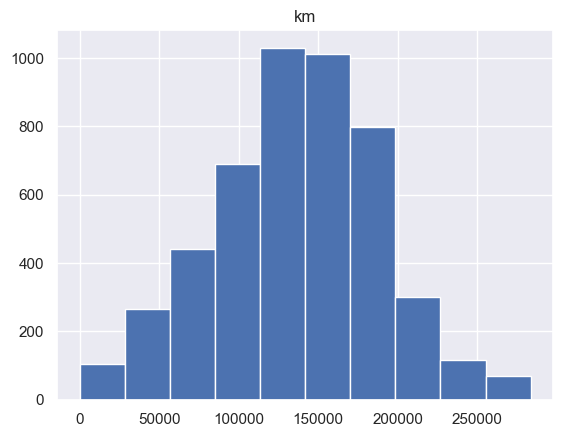

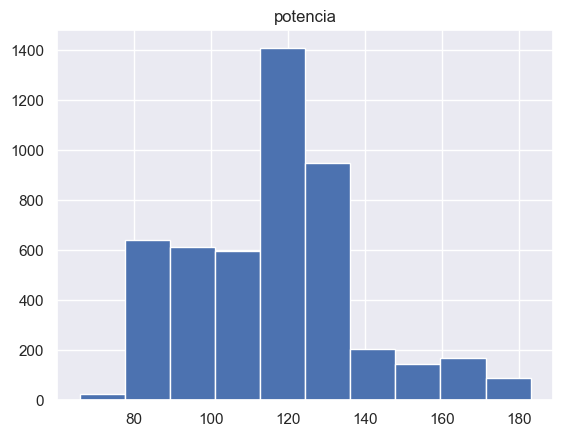

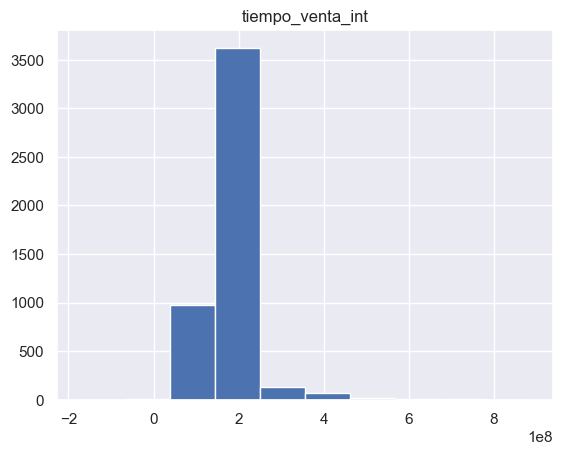

In [219]:
for i in lnum:
  print(bmw9.hist(i))

[[<Axes: title={'center': 'volante_regulable_int'}>]]
[[<Axes: title={'center': 'aire_acondicionado_int'}>]]
[[<Axes: title={'center': 'camara_trasera_int'}>]]
[[<Axes: title={'center': 'elevalunas_electrico_int'}>]]
[[<Axes: title={'center': 'bluetooth_int'}>]]
[[<Axes: title={'center': 'gps_int'}>]]
[[<Axes: title={'center': 'alerta_lim_velocidad_int'}>]]


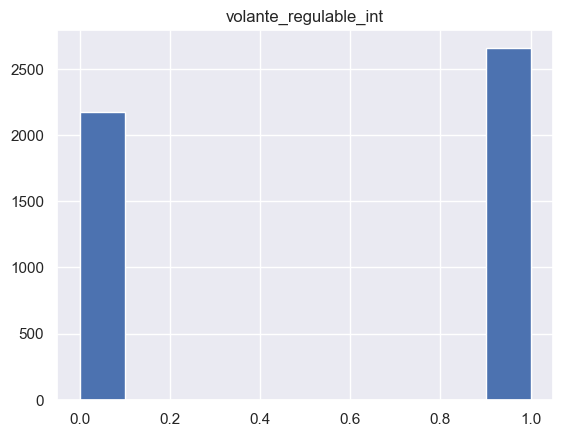

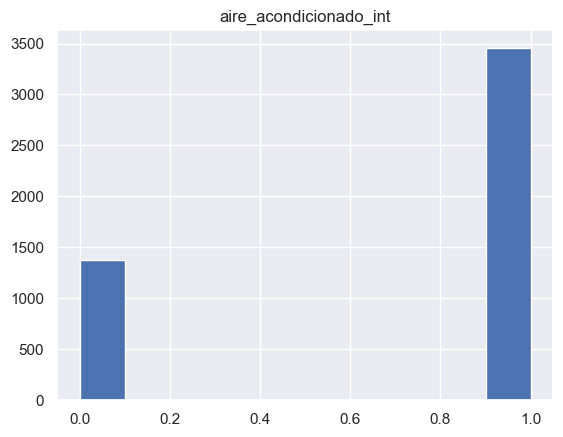

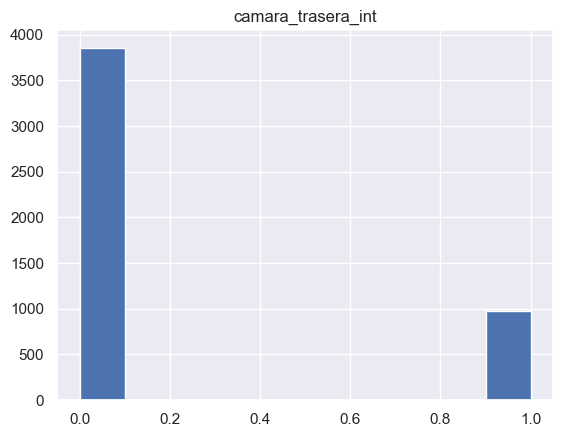

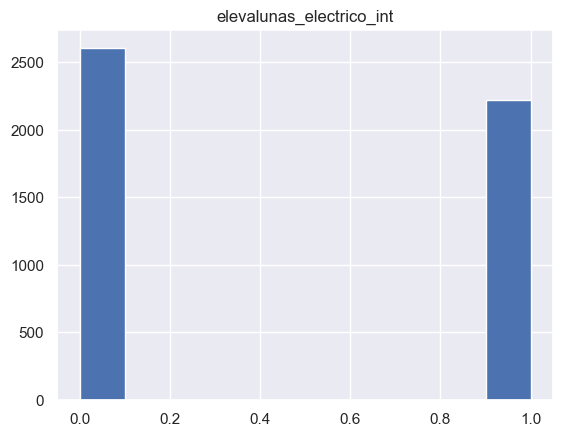

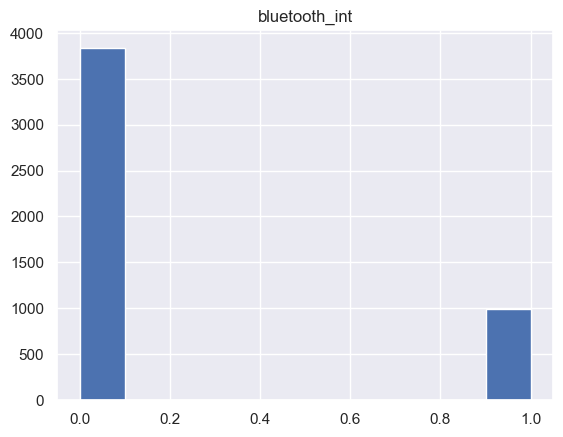

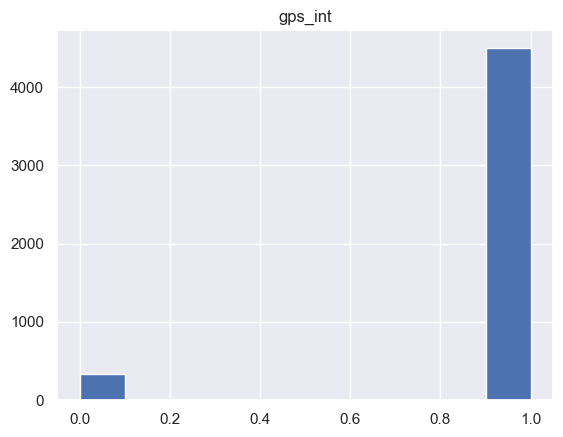

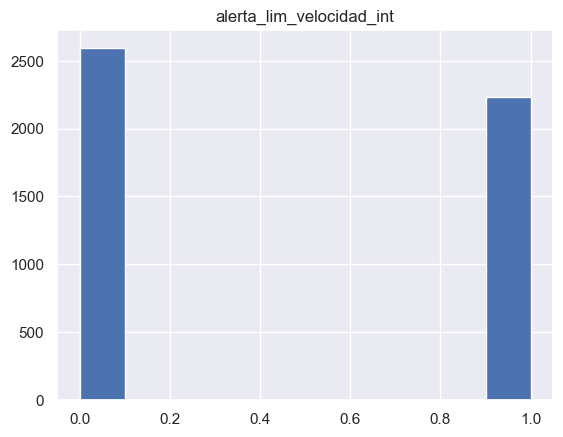

In [220]:
for i in lbool:
  print(bmw9.hist(i))

In [221]:
for i in lcat:
  print(bmw9[i].value_counts())

modelo
320                750
520                632
318                566
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
tipo_gasolina
diesel               4620
petrol                191
hybrid_petrol           8
sin_tipo_gasolina       5
Diesel                  5
electro                 3
Name: count, dtype: int64
color
black        1494
grey         1068
blue          647
white         483
sin_color     443
brown         302
silver        291
red            47
beige          37
green          14
orange          6
Name: count, dtype: int64
tipo_coche
sin_tipo_coche    1455
estate            1104
sedan              821
suv                754
hatchback          488
subcompact          77
coupe               74
convertible         30
van                 29
Name: count, dtype: int64


TAREGT : NORMALIZAR EL PRECIO

In [222]:
bmw10 = bmw9.copy()

In [223]:
# Hacemos el logaritmo del precio
bmw10["log_precio"] = np.log10(bmw10["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

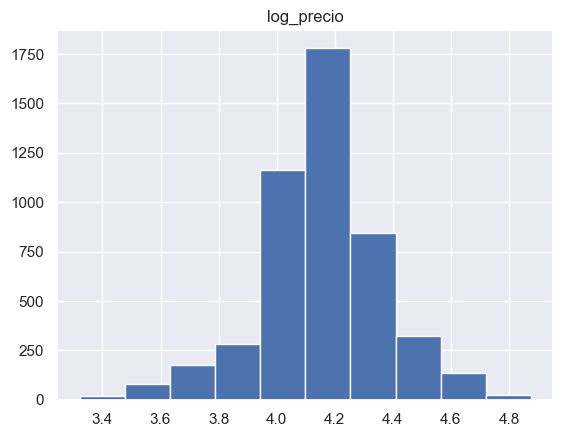

In [224]:
# Vemos el histograma del logaritmo del precio
bmw10.hist("log_precio")

<Axes: xlabel='precio'>

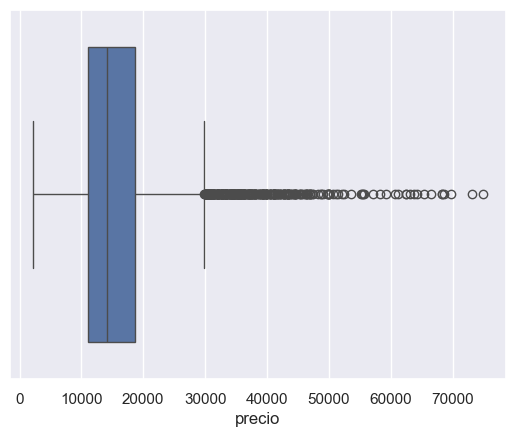

In [225]:
# Comparo el boxplot de precio con log_precio
sns.boxplot(x=bmw10["precio"])

<Axes: xlabel='log_precio'>

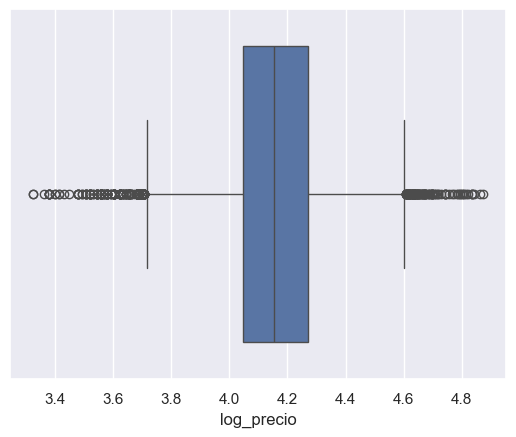

In [226]:
# Comparo el boxplot de precio con log_precio
sns.boxplot(x=bmw10["log_precio"])

In [227]:
# Actualizo mi target 
target = ["precio", "log_precio"]

TARGET VS VARIABLES INDEPENDIENTES

In [228]:
bmw10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4832 non-null   object 
 1   km                        4832 non-null   float64
 2   potencia                  4832 non-null   float64
 3   tipo_gasolina             4832 non-null   object 
 4   color                     4832 non-null   object 
 5   tipo_coche                4832 non-null   object 
 6   precio                    4832 non-null   float64
 7   tiempo_venta_int          4832 non-null   float64
 8   volante_regulable_int     4832 non-null   int32  
 9   aire_acondicionado_int    4832 non-null   int32  
 10  camara_trasera_int        4832 non-null   int32  
 11  elevalunas_electrico_int  4832 non-null   int32  
 12  bluetooth_int             4832 non-null   int32  
 13  gps_int                   4832 non-null   int32  
 14  alerta_lim_ve

In [229]:
# # Análisis variable vs target, hay algún insight interesante?

<Axes: >

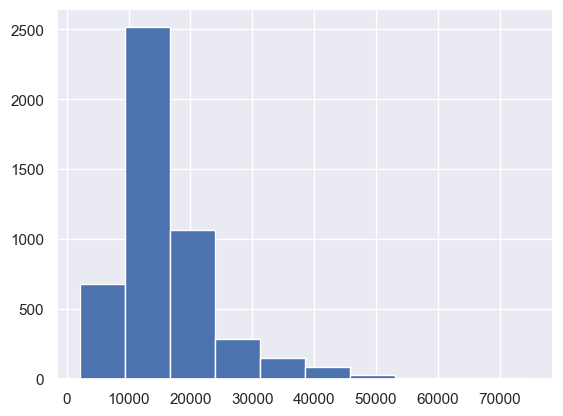

In [230]:
# Tiene una distribución bastante parecida a la normal (campana de gauss), desde que convertimos los nulos a la mediana
bmw10["precio"].hist()

<Axes: xlabel='potencia', ylabel='precio'>

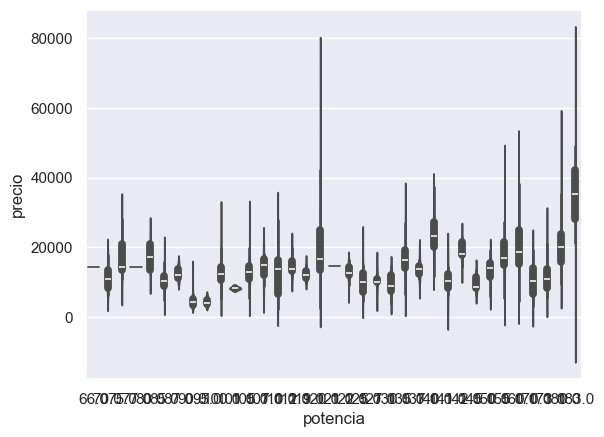

In [231]:
# Comparemos la potencia con el precio
# Con potencias de 120 o la máxima, gran rango de precio. Con potencias pequeñas, bajo rango de precio. 
sns.violinplot(x="potencia", y="precio", data=bmw9)

<Axes: xlabel='km', ylabel='precio'>

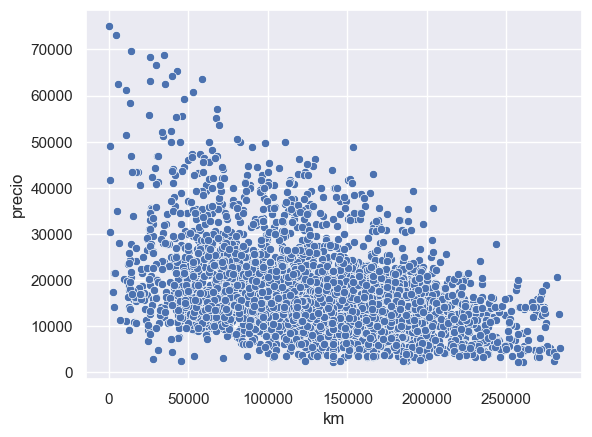

In [232]:
# Con muchos numeros, mejor aplicar un scatterplot
# De una manera genral, se puede ver que coches con más km tienden a tener menos precio, y viceversa, coches con menos km, tienen más precio). 
sns.scatterplot(x="km", y="precio", data=bmw10)

<Axes: xlabel='potencia', ylabel='precio'>

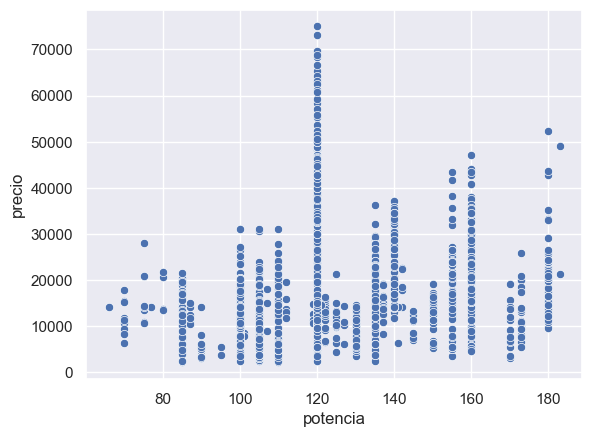

In [233]:
# Con muchos numeros, mejor aplicar un scatterplot
# Se puede ver que los coches de 120 de potencia hay todo un rango de precios. Los coches de muy baja o muy alta potencia, hay menos rango en el precio. 
sns.scatterplot(x="potencia", y="precio", data=bmw10)

<Axes: xlabel='km', ylabel='precio'>

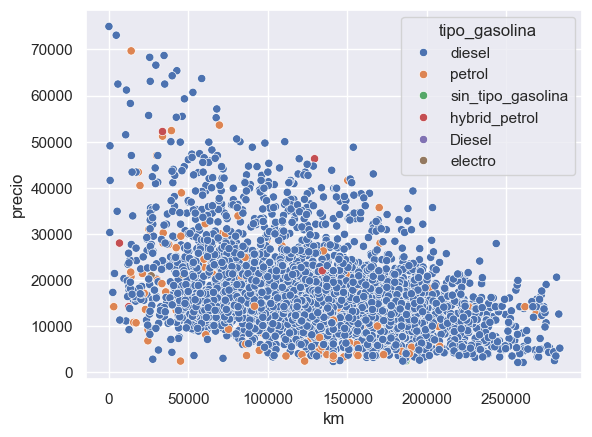

In [234]:
# Con muchos numeros, mejor aplicar un scatterplot
# Los coches híbrisos suelen ocupar posiciones más medias o elevadas de precio
# Mucha variedad de coches de diesel, seguido por petroleso, que en general son de precios bajos cuando hay algo de kilometraje. 
# Poca variedad de cohes sin tipo de gasolina, diesel o electro. 
sns.scatterplot(x="km", y="precio", hue="tipo_gasolina", data=bmw10)

<Axes: xlabel='km', ylabel='precio'>

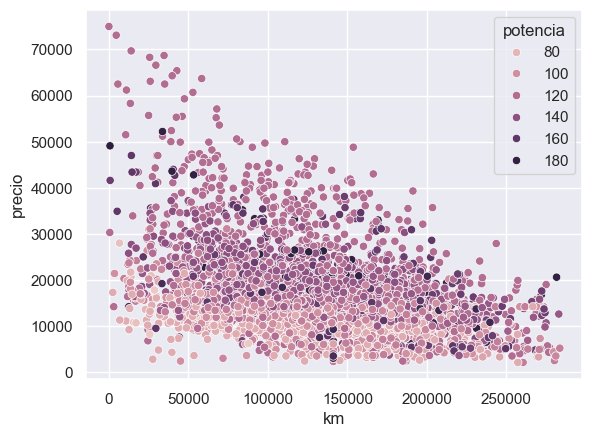

In [235]:
# Con muchos numeros, mejor aplicar un scatterplot
# Los de menos potencia, suelen ser de menos precio. De 120 de potencia, hay una gran variedad de precio y km. 
sns.scatterplot(x="km", y="precio", hue="potencia", data=bmw10)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


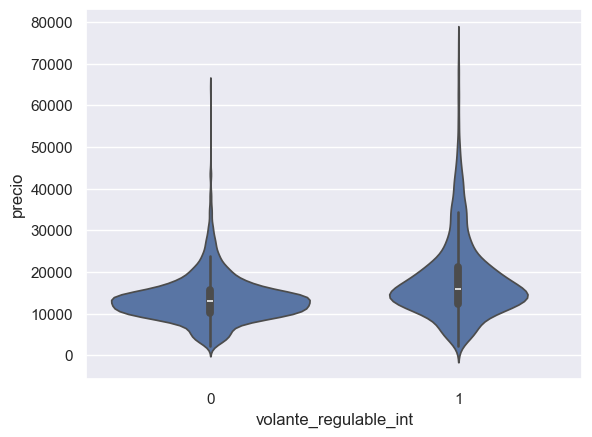

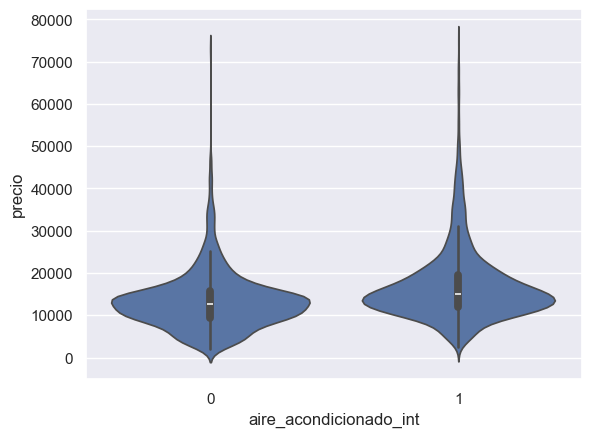

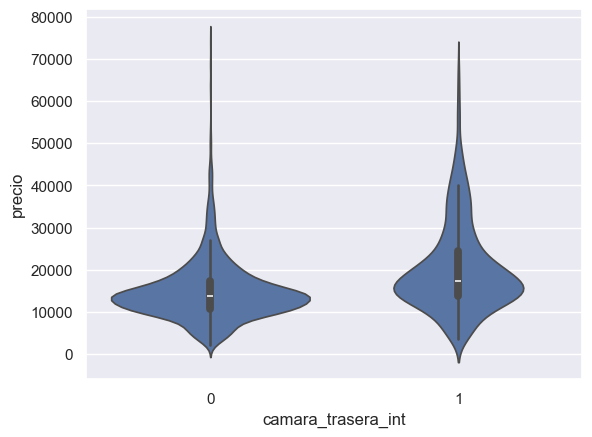

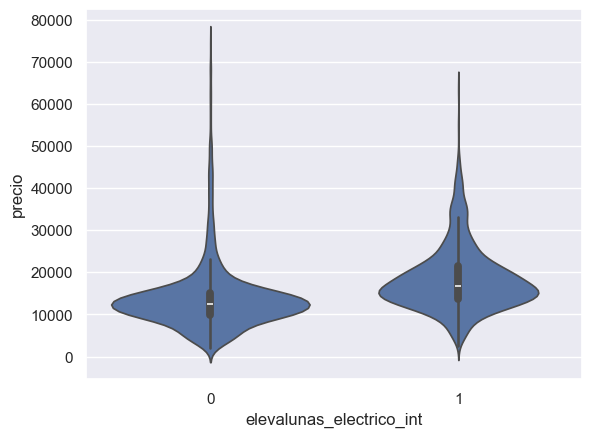

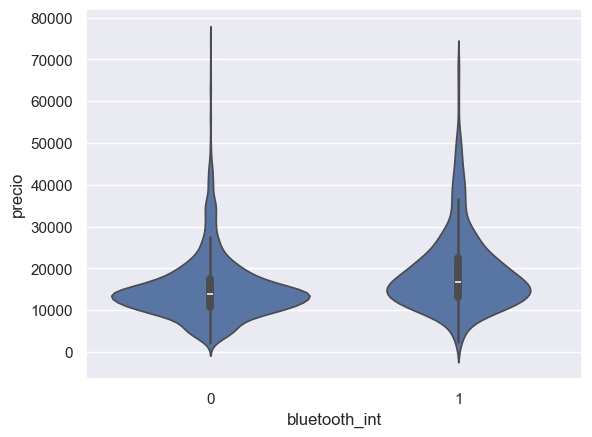

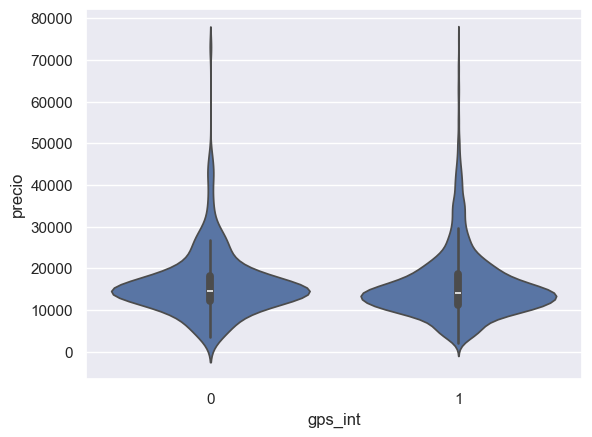

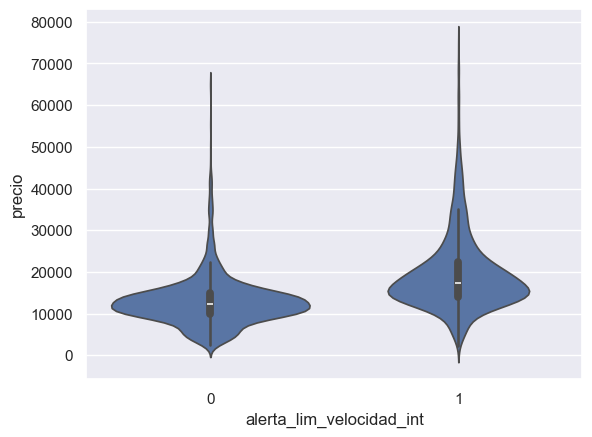

In [236]:
# Vamos a hacer un for para ver del violinplot de cada columna de lbool:
for i in lbool:
    plt.figure()
    n = sns.violinplot(x=i, y= "precio", data =bmw10)
    print(n)

TRANSFORMAR CATEGORICAS A NUMERICAS

In [237]:
bmw11=bmw10.copy()

In [238]:
bmw11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4832 non-null   object 
 1   km                        4832 non-null   float64
 2   potencia                  4832 non-null   float64
 3   tipo_gasolina             4832 non-null   object 
 4   color                     4832 non-null   object 
 5   tipo_coche                4832 non-null   object 
 6   precio                    4832 non-null   float64
 7   tiempo_venta_int          4832 non-null   float64
 8   volante_regulable_int     4832 non-null   int32  
 9   aire_acondicionado_int    4832 non-null   int32  
 10  camara_trasera_int        4832 non-null   int32  
 11  elevalunas_electrico_int  4832 non-null   int32  
 12  bluetooth_int             4832 non-null   int32  
 13  gps_int                   4832 non-null   int32  
 14  alerta_lim_ve

In [239]:
lnum2, lbool2, lcat2 = obtener_lista_variables(bmw11)

In [240]:
lcat2

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [241]:
# Convierto las categoricas lcat a 1 y 0. Me daba true/false, por eso lo he multiplicado * 1 
bmw12 = pd.get_dummies(data=bmw11, columns=lcat2)*1

In [242]:
bmw11.shape

(4832, 16)

In [243]:
# Comparamos el tamaño del dataframe con el anterior, para comprobar nº de columnas
bmw12.shape

(4832, 114)

In [244]:
bmw12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Columns: 114 entries, km to tipo_coche_van
dtypes: float64(5), int32(109)
memory usage: 2.2 MB


CORRELACION INTERMEDIA

In [245]:
corr2 = bmw12.corr(numeric_only=True)

In [246]:
corr2.style.background_gradient(cmap="coolwarm")

NORMALIZAR VARIABLES NUMERICAS 

In [247]:
bmw13=bmw12.copy()

In [248]:
# Minmaxscaler 
minMaxResultado_km = MinMaxScaler()

In [249]:
minMaxResultado_potencia = MinMaxScaler()

In [250]:
minMaxResultado_tiempo_venta_int = MinMaxScaler()

In [251]:
lnum2

['km', 'potencia', 'tiempo_venta_int']

In [252]:
# # Minmaxscaler km
bmw13[lnum2]= minMaxResultado_km.fit_transform(bmw13[lnum2])

In [253]:
# # Minmaxscaler potencia
bmw13[lnum2]= minMaxResultado_potencia.fit_transform(bmw13[lnum2])

In [254]:
# # Minmaxscaler tiempo_venta_int
bmw13[lnum2]= minMaxResultado_tiempo_venta_int.fit_transform(bmw13[lnum2])

In [255]:
bmw13.head()

km  potencia   precio  tiempo_venta_int  volante_regulable_int  \
0  0.495195  0.290598  11300.0          0.339936                      1   
1  0.049327  0.461538  69700.0          0.307818                      1   
2  0.646375  0.461538  10200.0          0.337572                      0   
3  0.451568  0.589744  25100.0          0.307818                      1   
4  0.342507  0.803419  33400.0          0.307818                      1   

   aire_acondicionado_int  camara_trasera_int  elevalunas_electrico_int  \
0                       1                   0                         1   
1                       1                   0                         0   
2                       0                   0                         1   
3                       1                   0                         1   
4                       1                   0                         0   

   bluetooth_int  gps_int  ...  color_white  tipo_coche_convertible  \
0              0        1  ...            0                       0   
1              1        1  ...            0                       1   
2              0        1  ...            1                       0   
3              1        1  ...            0                       1   
4              1        1  ...            0                       0   

   tipo_coche_coupe  tipo_coche_estate  tipo_coche_hatchback  \
0                 0                  0                     0   
1                 0                  0                     0   
2                 0                  0                     0   
3                 0                  0                     0   
4                 0                  0                     0   

   tipo_coche_sedan  tipo_coche_sin_tipo_coche  tipo_coche_subcompact  \
0                 0                          1                      0   
1                 0                          0                      0   
2                 0                          1                      0   
3                 0                          0                      0   
4                 0                          1                      0   

   tipo_coche_suv  tipo_coche_van  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 114 columns]

CORRELACION FINAL

In [256]:
# Análisis de correlación final, hay alguna variable correlacionada?

In [257]:
corr2 = bmw13.corr(numeric_only=True)

In [258]:
corr2.style.background_gradient(cmap="coolwarm")

In [259]:
# Análisis de correlación final, hay alguna variable correlacionada?
# Correlacion entre precio y log_precio
# Correlacion tipo_gasolina_electrica y mi3, 0.7

In [260]:
bmw13.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4832 entries, 0 to 4842
Columns: 114 entries, km to tipo_coche_van
dtypes: float64(5), int32(109)
memory usage: 2.2 MB


In [261]:
bmw13.head(20)

km  potencia   precio  tiempo_venta_int  volante_regulable_int  \
0   0.495195  0.290598  11300.0          0.339936                      1   
1   0.049327  0.461538  69700.0          0.307818                      1   
2   0.646375  0.461538  10200.0          0.337572                      0   
3   0.451568  0.589744  25100.0          0.307818                      1   
4   0.342507  0.803419  33400.0          0.307818                      1   
5   0.537289  0.461538  17100.0          0.364963                      1   
6   0.723653  0.675214  12400.0          0.307818                      1   
7   0.407592  0.333333   6100.0          0.416972                      1   
8   0.436942  0.504274   6200.0          0.307818                      1   
9   0.492128  0.589744  17300.0          0.307818                      0   
10  0.272067  0.589744  19300.0          0.307818                      1   
11  0.803959  0.675214  13300.0          0.307818                      1   
12  0.465633  0.589744  21700.0          0.282873                      1   
13  0.271877  0.589744  36300.0          0.240646                      1   
14  0.615826  0.461538  10500.0          0.439064                      1   
15  0.736788  0.547009   8300.0          0.461482                      1   
16  0.074842  0.589744  21900.0          0.245700                      0   
17  0.086666  0.461538   9200.0          0.307818                      1   
18  0.724552  0.675214  11000.0          0.429282                      1   
19  0.454758  0.376068   7700.0          0.307818                      1   

    aire_acondicionado_int  camara_trasera_int  elevalunas_electrico_int  \
0                        1                   0                         1   
1                        1                   0                         0   
2                        0                   0                         1   
3                        1                   0                         1   
4                        1                   0                         0   
5                        1                   0                         1   
6                        1                   0                         1   
7                        1                   0                         0   
8                        0                   0                         0   
9                        0                   0                         1   
10                       1                   0                         1   
11                       1                   0                         1   
12                       0                   0                         1   
13                       1                   0                         1   
14                       1                   0                         0   
15                       1                   0                         1   
16                       0                   1                         0   
17                       0                   0                         0   
18                       1                   0                         1   
19                       0                   0                         0   

    bluetooth_int  gps_int  ...  color_white  tipo_coche_convertible  \
0               0        1  ...            0                       0   
1               1        1  ...            0                       1   
2               0        1  ...            1                       0   
3               1        1  ...            0                       1   
4               1        1  ...            0                       0   
5               1        1  ...            0                       0   
6               1        1  ...            0                       1   
7               1        1  ...            1                       1   
8               0        1  ...            0                       1   
9               0        1  ...            1                       1   
10              0       